<a href="https://colab.research.google.com/github/Dynamo-Dream/Stock_Price_Prediction/blob/main/Powergrid_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction of POWERGRIDStock

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/powergrid.csv")

In [ ]:
df = df[::-1] ## Only To reverse Dataset
df = df.reset_index(drop=True)

In [ ]:
df.head()

Date  series   OPEN    HIGH     LOW   PREV. CLOSE     ltp   close   \
0  22-Sep-2022      EQ  224.0  226.40  219.15        227.05  220.05  220.10   
1  23-Sep-2022      EQ  218.3  219.75  198.10        220.10  202.35  202.55   
2  26-Sep-2022      EQ  200.0  209.35  186.35        202.55  200.35  200.85   
3  27-Sep-2022      EQ  205.8  207.90  201.25        200.85  205.25  204.85   
4  28-Sep-2022      EQ  205.2  210.40  202.55        204.85  207.30  207.70   

    vwap   52W H   52W L        VOLUME               VALUE  No of trades   
0  221.26  248.35   175.1   1,96,98,398   4,35,84,93,171.30      1,06,819  
1  205.37  248.35   175.1   6,53,72,042  13,42,52,71,236.20      2,90,220  
2  196.47  248.35   175.1  12,56,60,351  24,68,89,83,918.40      4,83,237  
3  204.48  248.35   175.1   4,05,95,322   8,30,08,71,276.00      1,76,408  
4  206.85  248.35   175.1   3,96,58,405   8,20,35,21,463.70      1,49,009

In [ ]:
df.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [ ]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [ ]:
df.reset_index()

index        Date  series    OPEN    HIGH     LOW   PREV. CLOSE     ltp   \
0        0  22-Sep-2022      EQ  224.00  226.40  219.15        227.05  220.05   
1        1  23-Sep-2022      EQ  218.30  219.75  198.10        220.10  202.35   
2        2  26-Sep-2022      EQ  200.00  209.35  186.35        202.55  200.35   
3        3  27-Sep-2022      EQ  205.80  207.90  201.25        200.85  205.25   
4        4  28-Sep-2022      EQ  205.20  210.40  202.55        204.85  207.30   
..     ...          ...     ...     ...     ...     ...           ...     ...   
244    244  15-Sep-2023      EQ  196.15  196.20  192.20        195.15  194.10   
245    245  18-Sep-2023      EQ  195.25  200.50  194.10        194.10  200.15   
246    246  20-Sep-2023      EQ  198.70  205.95  198.45        200.10  204.80   
247    247  21-Sep-2023      EQ  205.00  205.55  200.40        204.65  202.15   
248    248  22-Sep-2023      EQ  200.55  202.90  196.40        201.60  199.00   

     close    vwap   52W H   52W L        VOLUME               VALUE   \
0    220.10  221.26  248.35  175.10   1,96,98,398   4,35,84,93,171.30   
1    202.55  205.37  248.35  175.10   6,53,72,042  13,42,52,71,236.20   
2    200.85  196.47  248.35  175.10  12,56,60,351  24,68,89,83,918.40   
3    204.85  204.48  248.35  175.10   4,05,95,322   8,30,08,71,276.00   
4    207.70  206.85  248.35  175.10   3,96,58,405   8,20,35,21,463.70   
..      ...     ...     ...     ...           ...                 ...   
244  194.10  194.08  267.00  186.35   2,05,16,593   3,98,18,13,441.00   
245  200.10  197.52  267.00  186.35   2,56,27,043   5,06,18,27,701.20   
246  204.65  203.69  267.00  186.35   3,33,69,524   6,79,71,82,307.65   
247  201.60  202.34  267.00  186.35   2,03,32,556   4,11,40,42,959.85   
248  199.15  198.54  267.00  186.35   2,11,93,988   4,20,79,50,818.85   

    No of trades   
0        1,06,819  
1        2,90,220  
2        4,83,237  
3        1,76,408  
4        1,49,009  
..            ...  
244      1,49,652  
245      1,12,091  
246      2,12,188  
247      1,59,234  
248      1,67,973  

[249 rows x 15 columns]

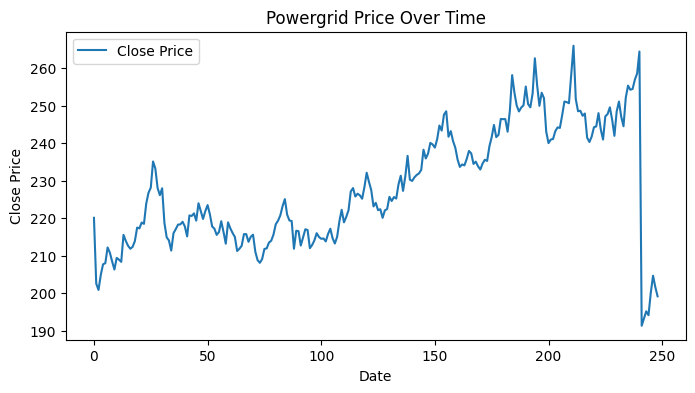

In [ ]:
target = 'close '
stock_name = "Powergrid"
plt.figure(figsize=(8, 4))
plt.plot(df[target], label='Close Price')
plt.title( stock_name +' Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

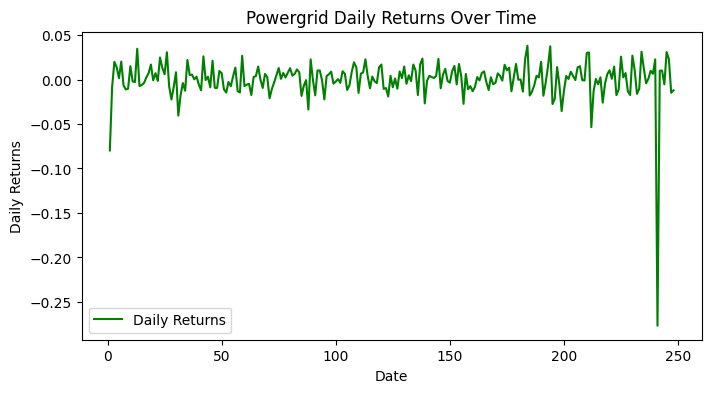

In [ ]:
daily_returns = df[target].pct_change()
plt.figure(figsize=(8, 4))
plt.plot(daily_returns, label='Daily Returns', color='green')
plt.title(stock_name+ ' Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

In [ ]:
print("Summary Statistics:")
print(df[target].describe())

Summary Statistics:
count    249.000000
mean     228.435542
std       15.773525
min      191.300000
25%      215.750000
50%      225.650000
75%      241.800000
max      266.050000
Name: close , dtype: float64


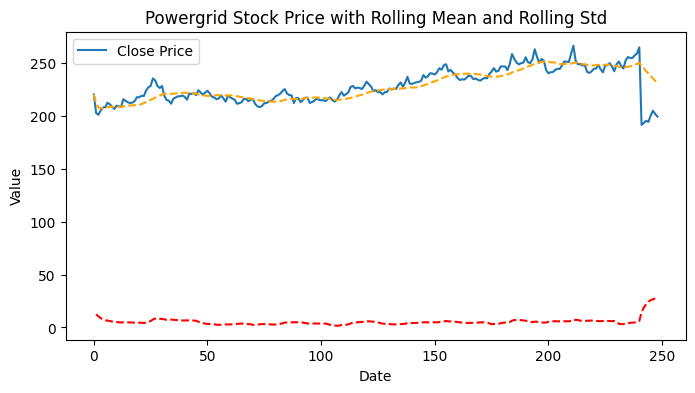

In [ ]:
window = 20
df['Rolling Mean'] = df[target].rolling(window=window,min_periods=1).mean()
df['Rolling Std'] = df[target].rolling(window=window,min_periods=1).std()

plt.figure(figsize=(8, 4))
plt.plot(df[target], label='Close Price')
plt.plot(df['Rolling Mean'],  linestyle='--', color='orange')
plt.plot(df['Rolling Std'], linestyle='--', color='red')
plt.title(stock_name + ' Stock Price with Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

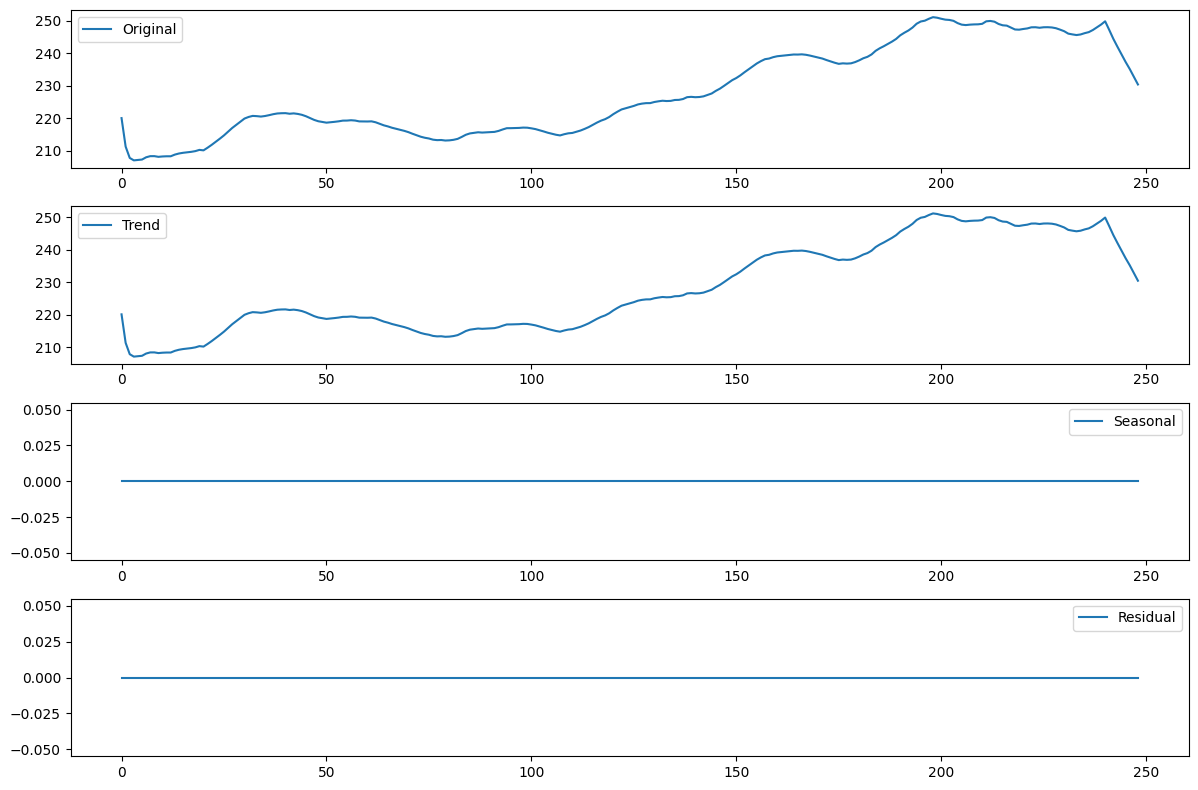

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Rolling Mean"], model='additive', period=1)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index,df["Rolling Mean"], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

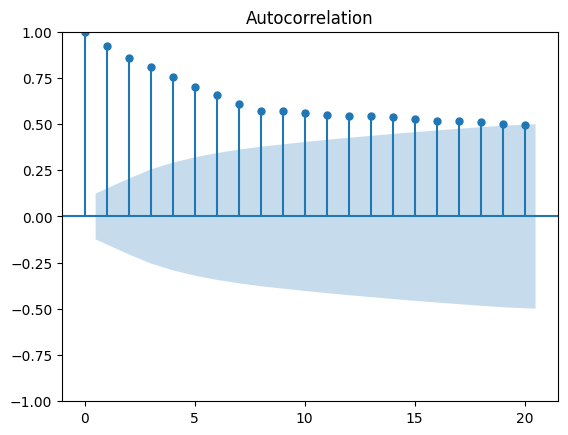

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
lag = 20
acf = plot_acf(df[target],lags = lag)

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df[target],autolag='AIC')
print("ADF: ", dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num of observation used for ADF Regression and Critical Values Calculation: ", dftest[3])
print("Critical Value")
for key,val in dftest[4].items():
    print("\t",key,": ",val)

ADF:  -2.6604852142362487
P-Value:  0.08112917522693303
Num Of Lags:  0
Num of observation used for ADF Regression and Critical Values Calculation:  248
Critical Value
	 1% :  -3.4569962781990573
	 5% :  -2.8732659015936024
	 10% :  -2.573018897632674


In [ ]:
df.set_index("Date ", inplace=True)
data = df[target]

In [ ]:
data = pd.DataFrame(data,columns=['close '])
data.head()

close 
Date               
22-Sep-2022  220.10
23-Sep-2022  202.55
26-Sep-2022  200.85
27-Sep-2022  204.85
28-Sep-2022  207.70

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
length = data.size
timestamp = 20
percent_data = 0.85

In [ ]:
data

close 
Date               
22-Sep-2022  220.10
23-Sep-2022  202.55
26-Sep-2022  200.85
27-Sep-2022  204.85
28-Sep-2022  207.70
...             ...
15-Sep-2023  194.10
18-Sep-2023  200.10
20-Sep-2023  204.65
21-Sep-2023  201.60
22-Sep-2023  199.15

[249 rows x 1 columns]

In [ ]:
from math import ceil
train = data.iloc[:ceil(length*percent_data),0]
test = data.iloc[ceil(length*percent_data)-timestamp:,0]

In [ ]:
train = pd.DataFrame(train,columns=['close '])
test = pd.DataFrame(test,columns=['close '])

In [ ]:
train.head()

close 
Date               
22-Sep-2022  220.10
23-Sep-2022  202.55
26-Sep-2022  200.85
27-Sep-2022  204.85
28-Sep-2022  207.70

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

array([[0.2952454 ],
       [0.02607362],
       [0.        ],
       [0.06134969],
       [0.10506135],
       [0.10966258],
       [0.17407975],
       [0.15260736],
       [0.11656442],
       [0.08358896],
       [0.13113497],
       [0.12423313],
       [0.11503067],
       [0.22546012],
       [0.20092025],
       [0.1809816 ],
       [0.16871166],
       [0.17638037],
       [0.20015337],
       [0.2553681 ],
       [0.25230061],
       [0.27607362],
       [0.27070552],
       [0.35352761],
       [0.39800613],
       [0.41871166],
       [0.52607362],
       [0.49769939],
       [0.41717791],
       [0.38803681],
       [0.41641104],
       [0.27453988],
       [0.2154908 ],
       [0.20245399],
       [0.16104294],
       [0.23236196],
       [0.24923313],
       [0.26763804],
       [0.26840491],
       [0.2791411 ],
       [0.25996933],
       [0.21932515],
       [0.30521472],
       [0.30291411],
       [0.31365031],
       [0.28374233],
       [0.35506135],
       [0.322

In [ ]:
train_length = scaled_train.size
val_percent = 0.10
train_data = scaled_train[:ceil(train_length*(1-val_percent))]
val_data = scaled_train[ceil(train_length*(1-val_percent))-timestamp:]
train_length

212

In [ ]:
def GenerateTimeSeries(dataset, timestamp, dataset_length):
  X = []
  Y = []
  for i in range(timestamp, dataset_length):
    X.append(dataset[i-timestamp:i,0])
    Y.append(dataset[i,0])
  X,Y = np.array(X),np.array(Y)

  return X,Y


In [ ]:
train_data.shape[0]

191

In [ ]:
timestamp = 20
X_train,Y_train = GenerateTimeSeries(train_data,timestamp, train_data.shape[0])

X_test,Y_test = GenerateTimeSeries(scaled_test, timestamp, scaled_test.shape[0])

In [ ]:
X_val, Y_val = GenerateTimeSeries(val_data, timestamp, val_data.shape[0])

In [ ]:
X_train,Y_train

(array([[0.2952454 , 0.02607362, 0.        , ..., 0.17638037, 0.20015337,
         0.2553681 ],
        [0.02607362, 0.        , 0.06134969, ..., 0.20015337, 0.2553681 ,
         0.25230061],
        [0.        , 0.06134969, 0.10506135, ..., 0.2553681 , 0.25230061,
         0.27607362],
        ...,
        [0.52530675, 0.50613497, 0.49309816, ..., 0.80828221, 0.7553681 ,
         0.73082822],
        [0.50613497, 0.49309816, 0.51763804, ..., 0.7553681 , 0.73082822,
         0.74693252],
        [0.49309816, 0.51763804, 0.53297546, ..., 0.73082822, 0.74693252,
         0.75613497]]),
 array([0.25230061, 0.27607362, 0.27070552, 0.35352761, 0.39800613,
        0.41871166, 0.52607362, 0.49769939, 0.41717791, 0.38803681,
        0.41641104, 0.27453988, 0.2154908 , 0.20245399, 0.16104294,
        0.23236196, 0.24923313, 0.26763804, 0.26840491, 0.2791411 ,
        0.25996933, 0.21932515, 0.30521472, 0.30291411, 0.31365031,
        0.28374233, 0.35506135, 0.32285276, 0.29064417, 0.32285276,
 

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,GRU, Input

In [ ]:
def lstm_model(input_shape):
  regressor = Sequential()
  regressor.add(LSTM(units=100,return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)

  regressor.summary()
  return Model(noise,output)

def gru_model(input_shape):
  regressor = Sequential()
  regressor.add(GRU(units=100, return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)
  regressor.summary()
  return Model(noise,output)

In [ ]:
feature = 1
input_shape = (timestamp,feature)
lstm = lstm_model(input_shape)
gru = gru_model(input_shape)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 20, 100)           40800     
                                                                 
 dropout_55 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_31 (LSTM)              (None, 20, 100)           80400     
                                                                 
 dropout_56 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_32 (LSTM)              (None, 20, 100)           80400     
                                                                 
 dropout_57 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_33 (LSTM)              (None, 20, 100)         

In [ ]:
lstm.compile(optimizer='adam', loss='mse')
gru.compile(optimizer='adam', loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    mode='min'
)

In [ ]:
lstm.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 11s 517ms/step - loss: 0.0967 - val_loss: 0.0158
Epoch 2/150
6/6 [==============================] - 1s 131ms/step - loss: 0.0342 - val_loss: 0.1451
Epoch 3/150
6/6 [==============================] - 1s 128ms/step - loss: 0.0284 - val_loss: 0.0176
Epoch 4/150
6/6 [==============================] - 1s 129ms/step - loss: 0.0211 - val_loss: 0.0892
Epoch 5/150
6/6 [==============================] - 1s 96ms/step - loss: 0.0215 - val_loss: 0.0165
Epoch 6/150
6/6 [==============================] - 0s 81ms/step - loss: 0.0172 - val_loss: 0.0297
Epoch 7/150
6/6 [==============================] - 0s 82ms/step - loss: 0.0151 - val_loss: 0.0158
Epoch 8/150
6/6 [==============================] - 0s 80ms/step - loss: 0.0143 - val_loss: 0.0164
Epoch 9/150
6/6 [==============================] - 0s 78ms/step - loss: 0.0152 - val_loss: 0.0340
Epoch 10/150
6/6 [==============================] - 0s 79ms/step - loss: 0.0170 - val_loss: 0.0159
Epoch 11/150
6

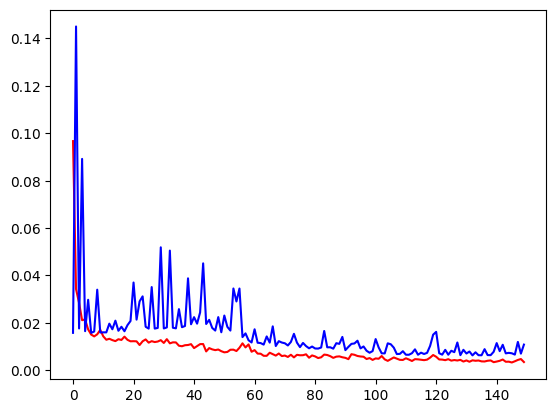

In [ ]:
plt.plot(lstm.history.history['loss'],color='red',label='train')
plt.plot(lstm.history.history['val_loss'],color='blue',label='train')

In [ ]:
gru.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 12s 418ms/step - loss: 0.0687 - val_loss: 0.0672
Epoch 2/150
6/6 [==============================] - 0s 76ms/step - loss: 0.0250 - val_loss: 0.0202
Epoch 3/150
6/6 [==============================] - 0s 72ms/step - loss: 0.0135 - val_loss: 0.0307
Epoch 4/150
6/6 [==============================] - 0s 75ms/step - loss: 0.0120 - val_loss: 0.0174
Epoch 5/150
6/6 [==============================] - 0s 72ms/step - loss: 0.0092 - val_loss: 0.0196
Epoch 6/150
6/6 [==============================] - 0s 81ms/step - loss: 0.0109 - val_loss: 0.0191
Epoch 7/150
6/6 [==============================] - 1s 117ms/step - loss: 0.0078 - val_loss: 0.0153
Epoch 8/150
6/6 [==============================] - 1s 120ms/step - loss: 0.0088 - val_loss: 0.0157
Epoch 9/150
6/6 [==============================] - 1s 119ms/step - loss: 0.0076 - val_loss: 0.0151
Epoch 10/150
6/6 [==============================] - 1s 119ms/step - loss: 0.0081 - val_loss: 0.0147
Epoch 11/150


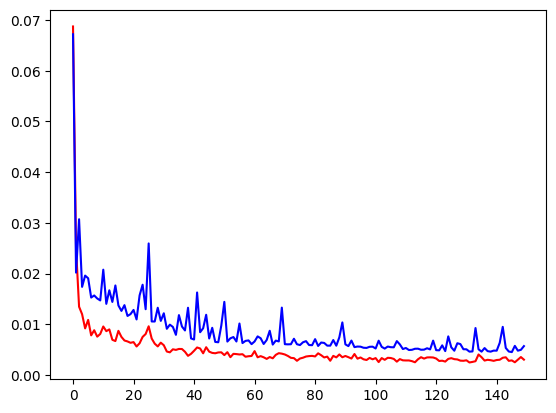

In [ ]:
plt.plot(gru.history.history['loss'],color='red',label='train')
plt.plot(gru.history.history['val_loss'],color='blue',label='train')

In [ ]:
gru_pred = gru.predict(X_test)

2/2 [==============================] - 2s 14ms/step


In [ ]:
lstm_pred = lstm.predict(X_test)

2/2 [==============================] - 2s 14ms/step


In [ ]:
gru_pred[0],lstm_pred[0],Y_test[0]

(array([0.9260986], dtype=float32),
 array([0.9956881], dtype=float32),
 0.7814417177914113)

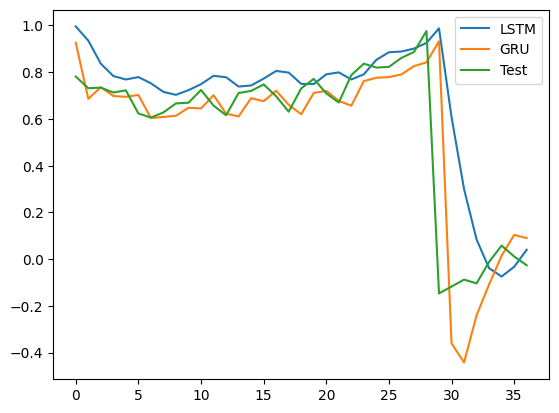

In [ ]:
plt.plot(lstm_pred, label='LSTM')
plt.plot(gru_pred, label='GRU')
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
lstm_pred = np.array(lstm_pred)
gru_pred = np.array(gru_pred)

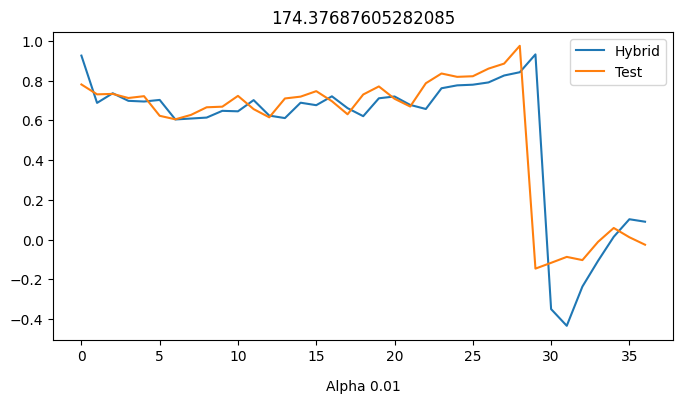

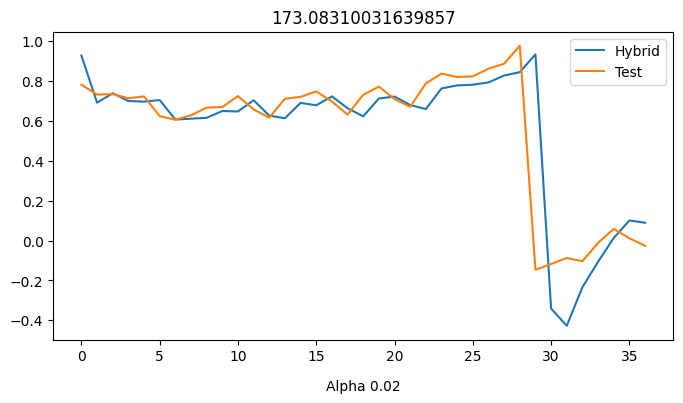

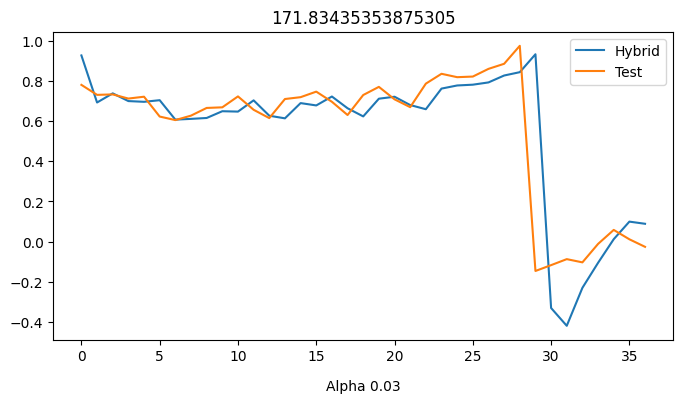

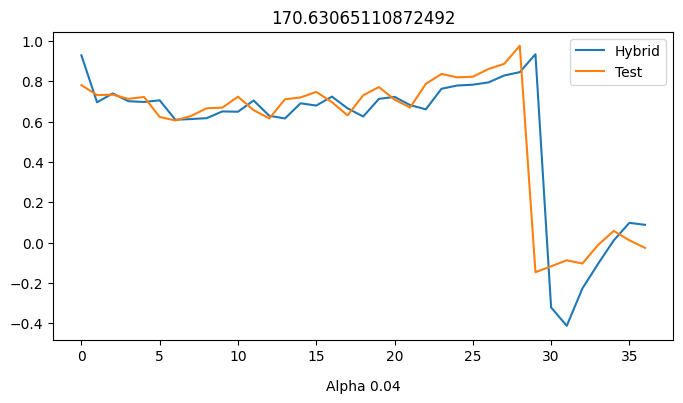

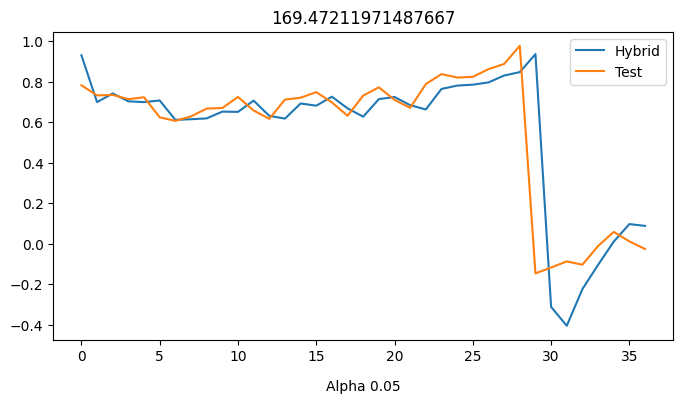

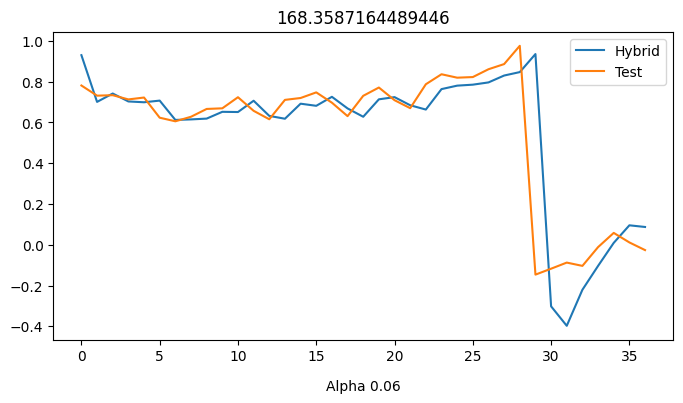

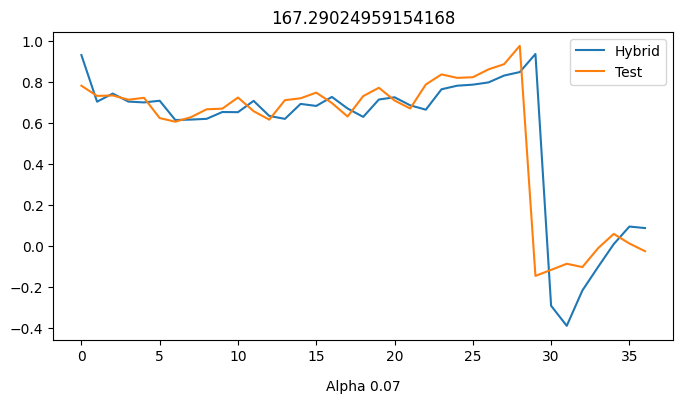

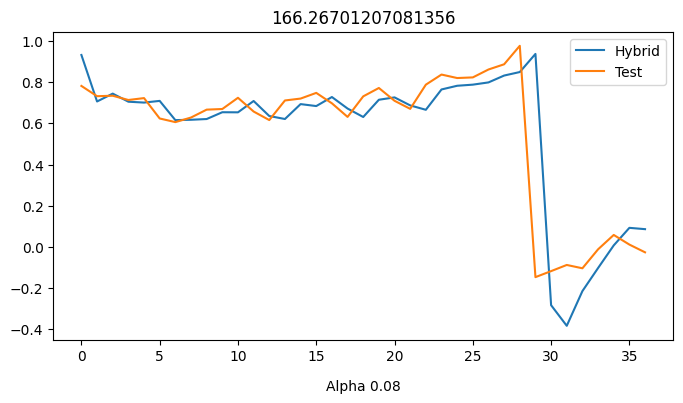

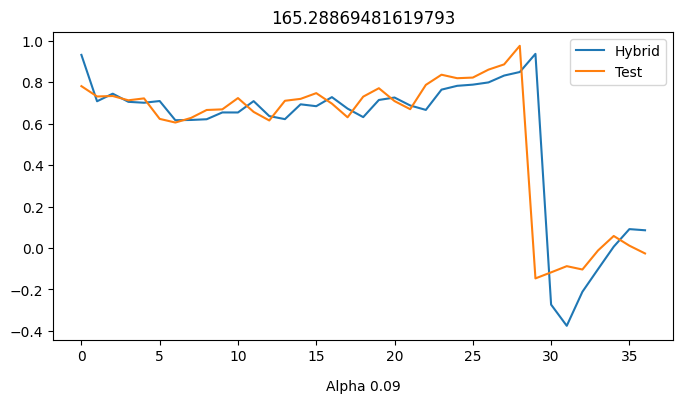

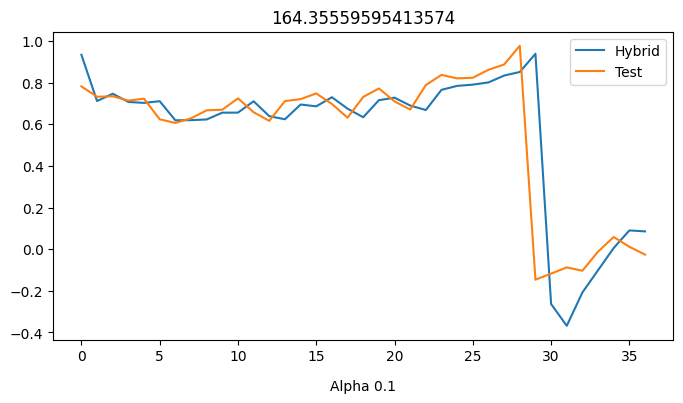

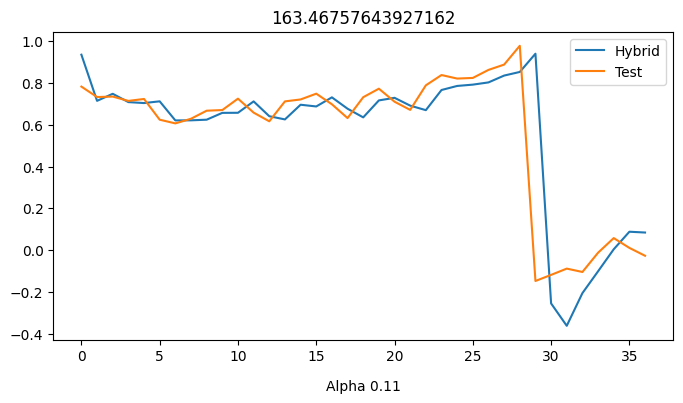

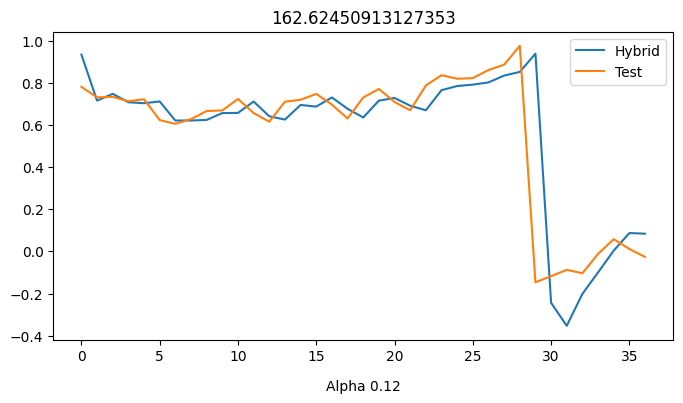

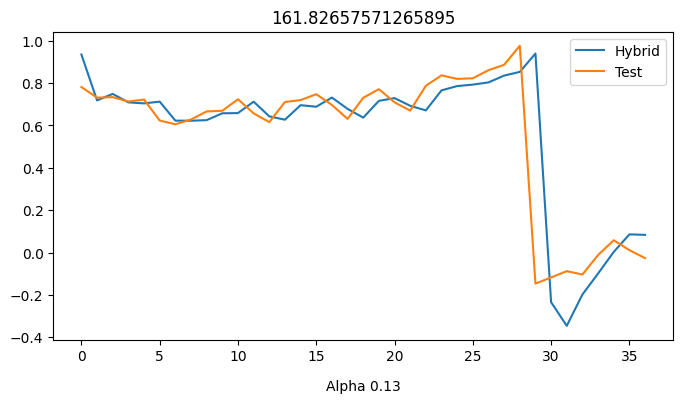

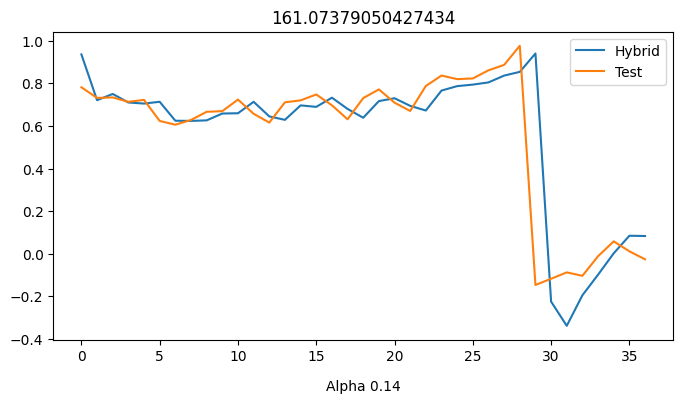

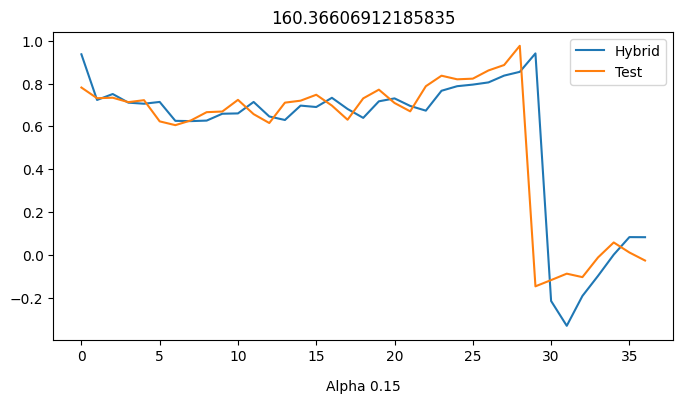

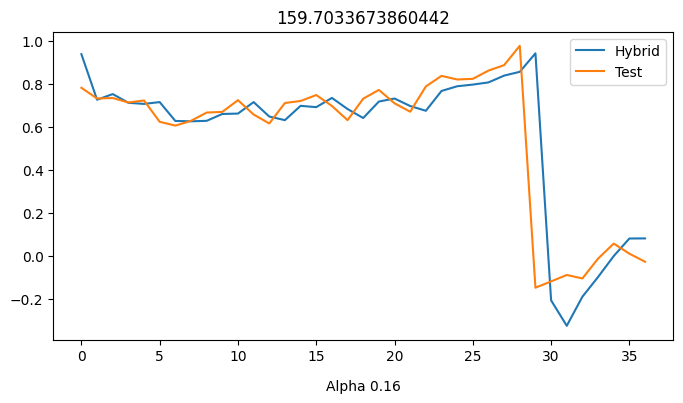

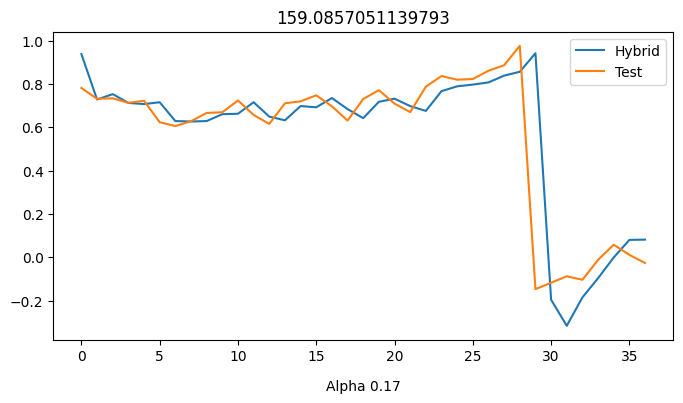

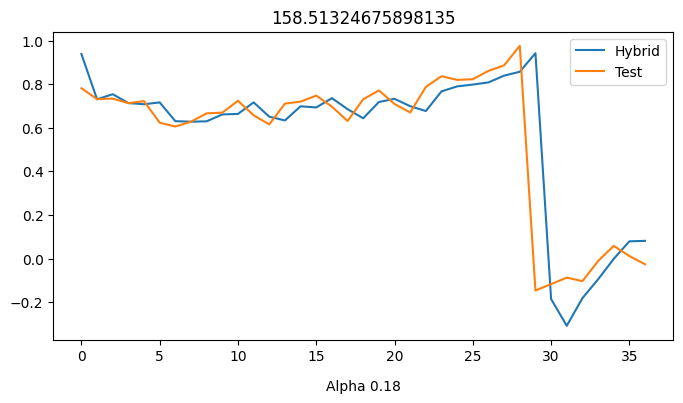

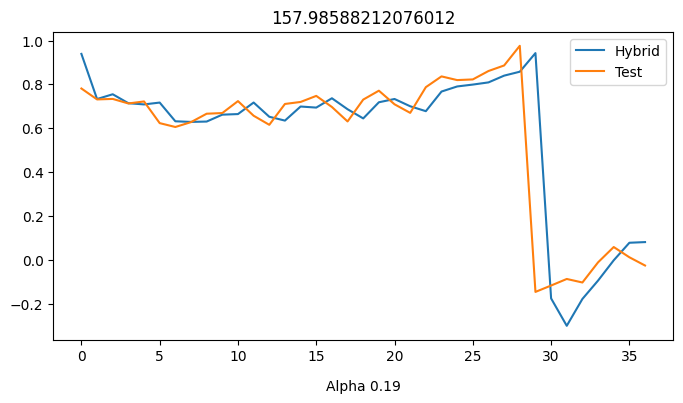

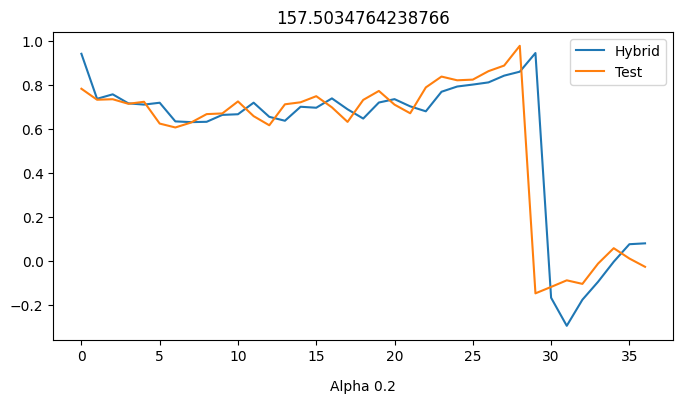

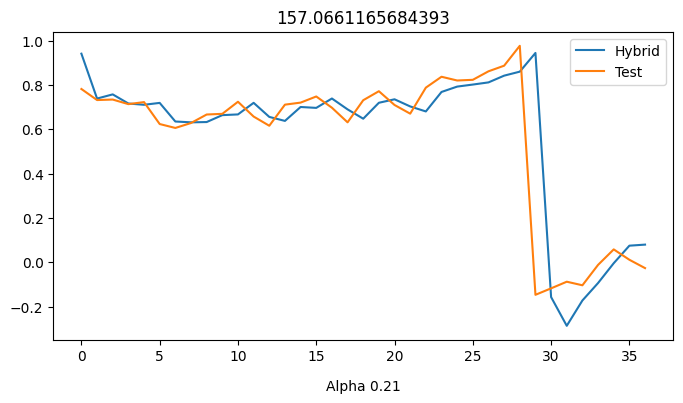

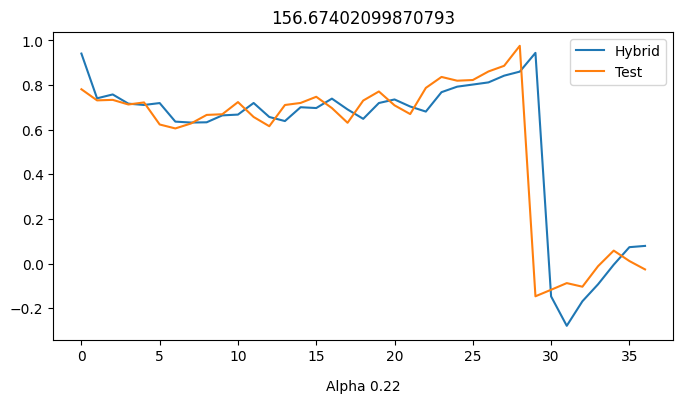

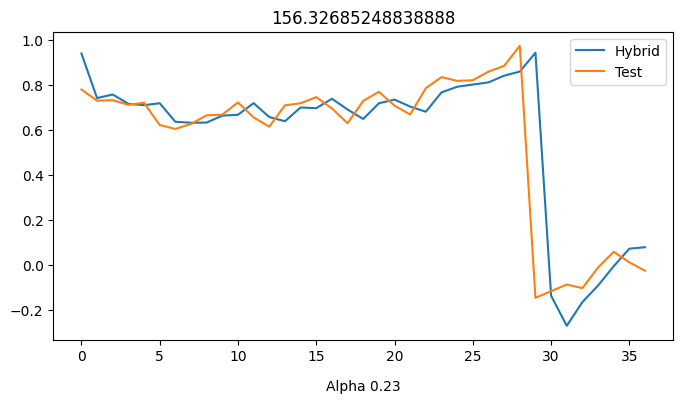

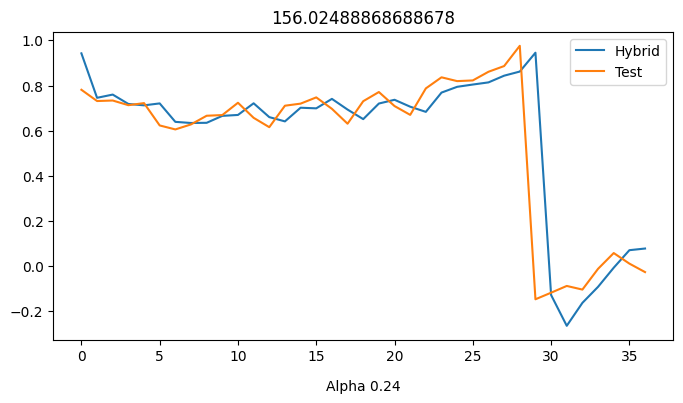

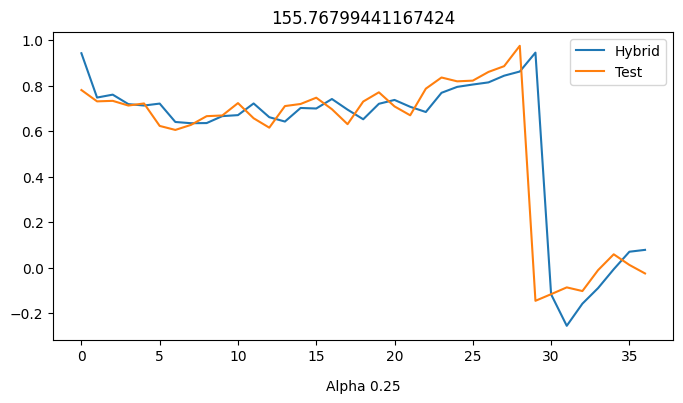

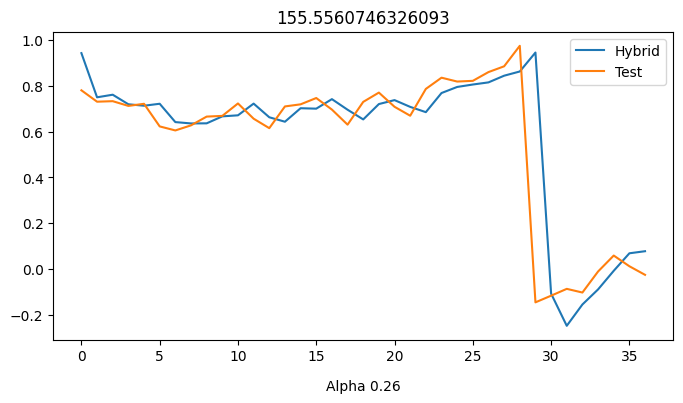

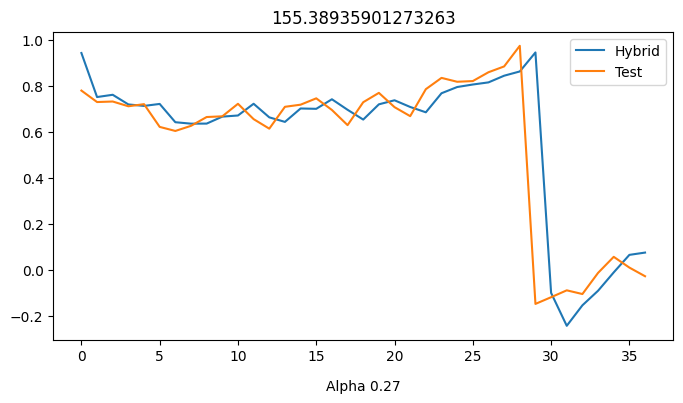

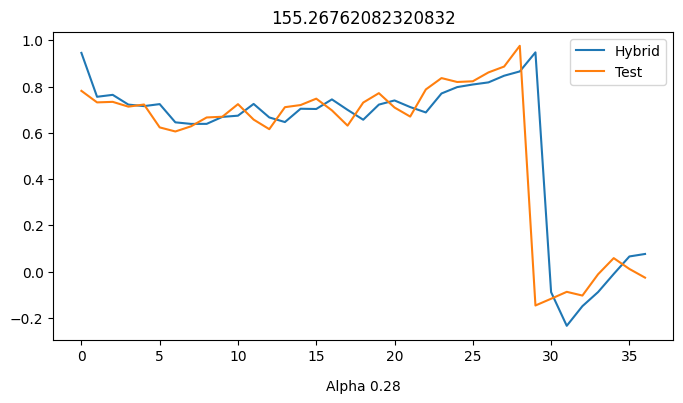

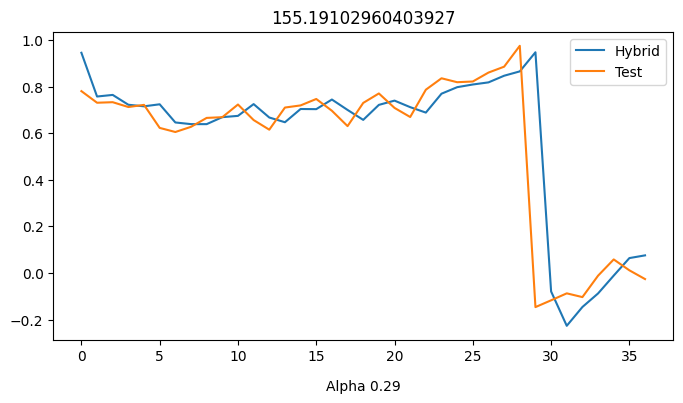

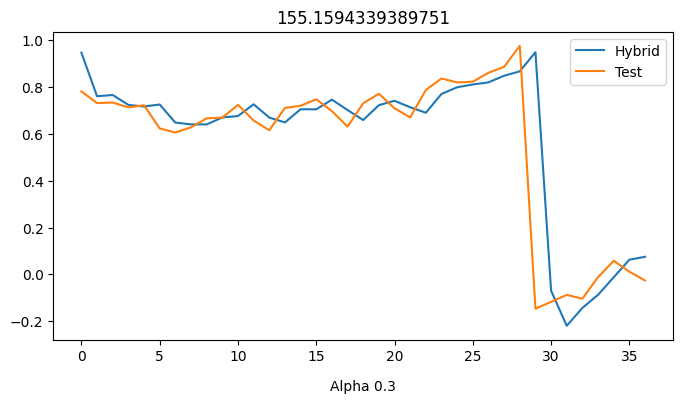

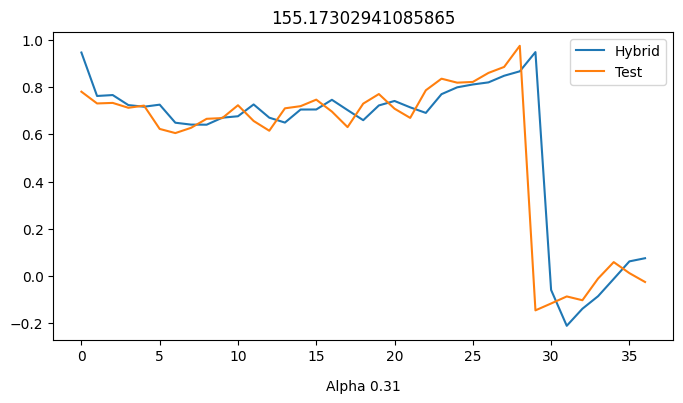

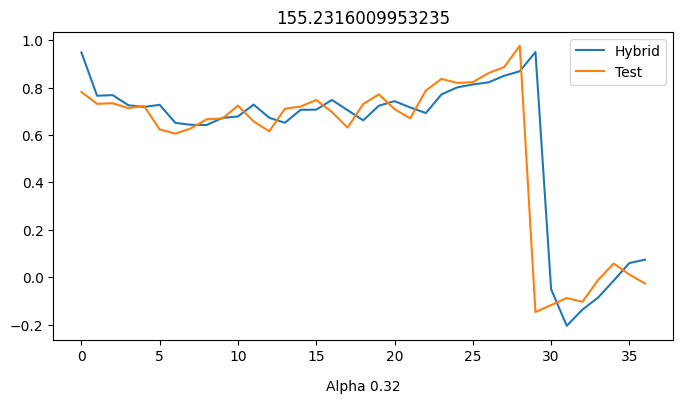

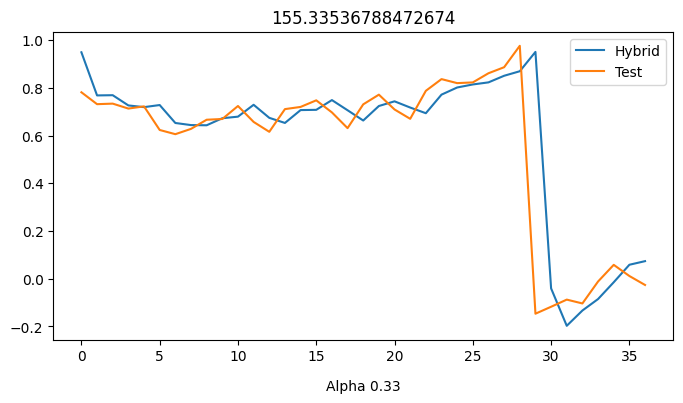

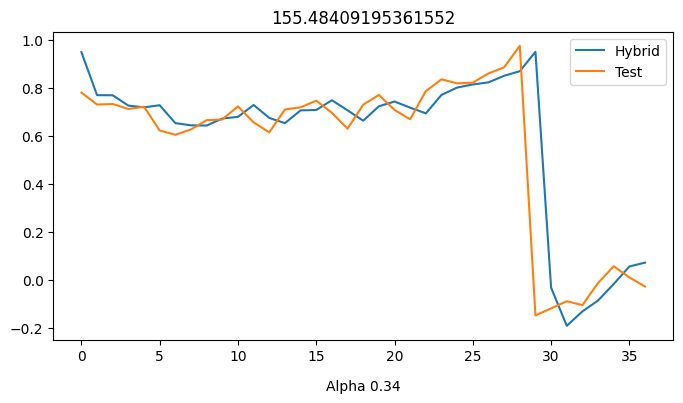

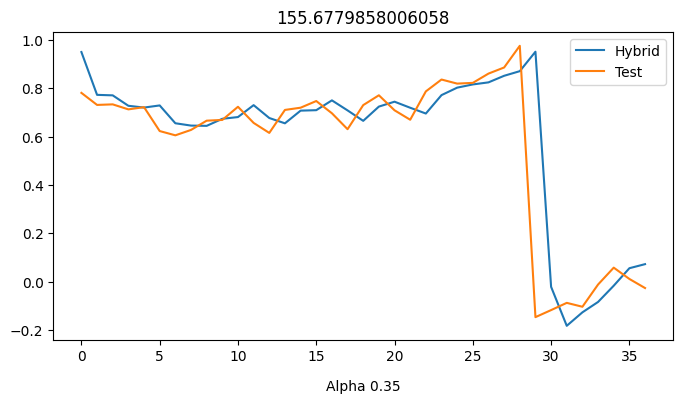

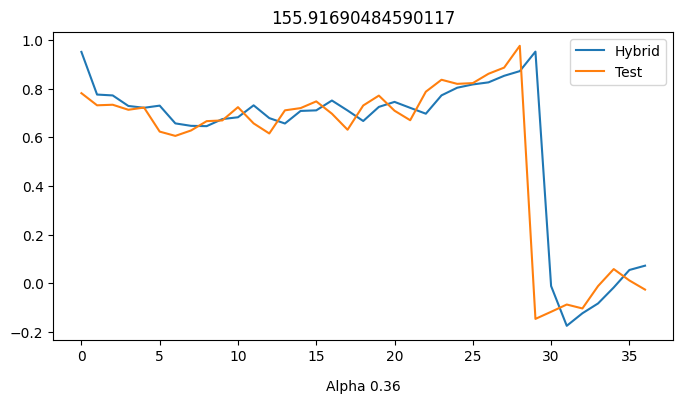

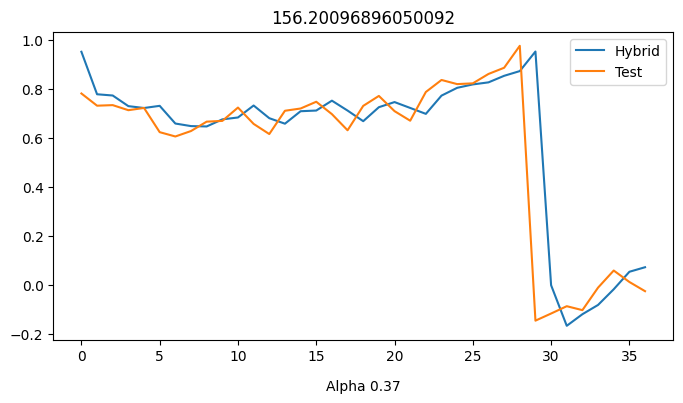

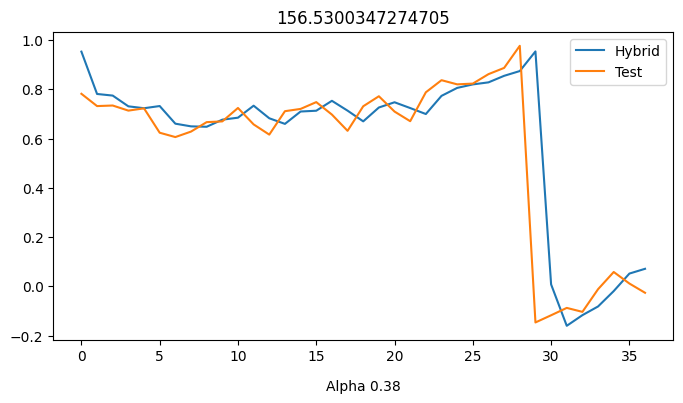

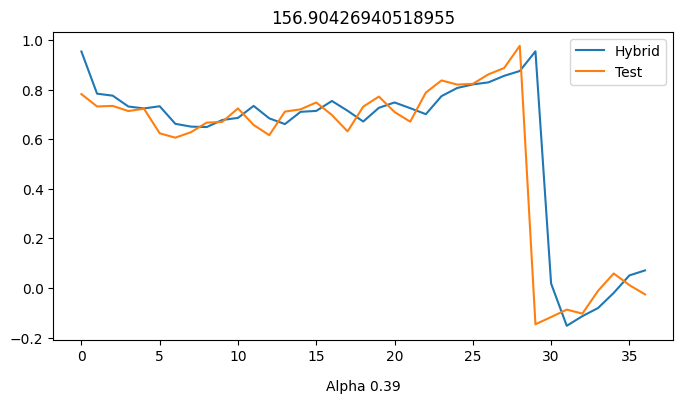

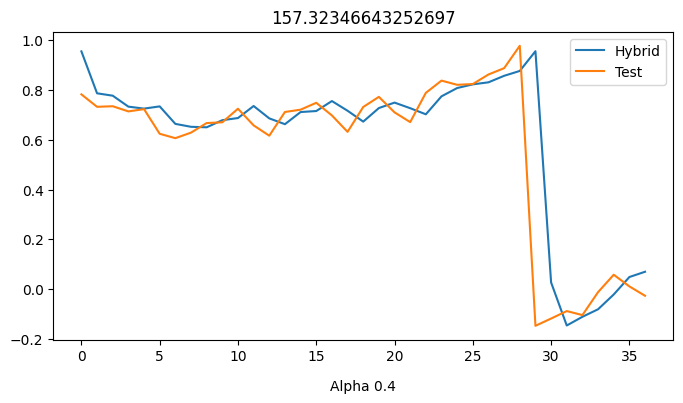

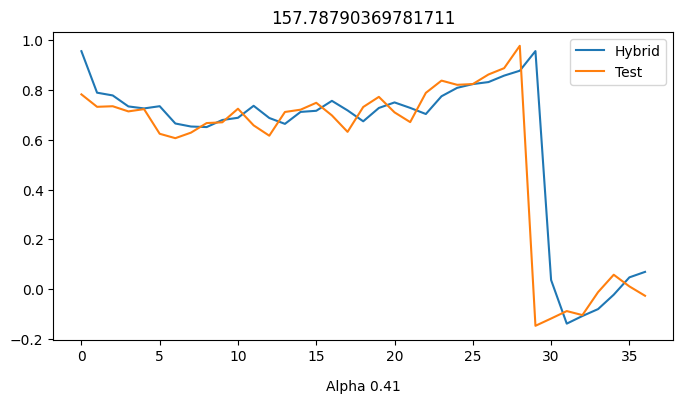

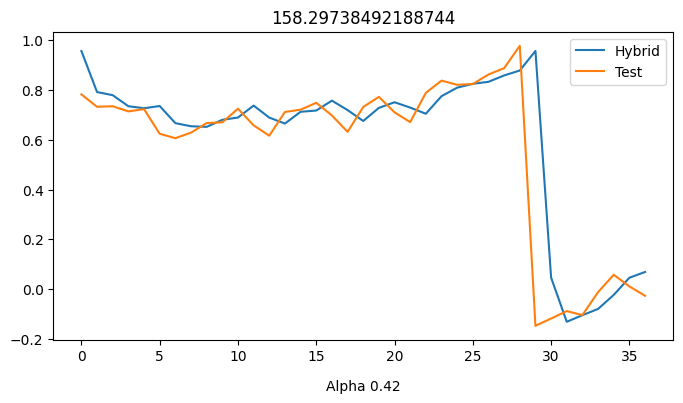

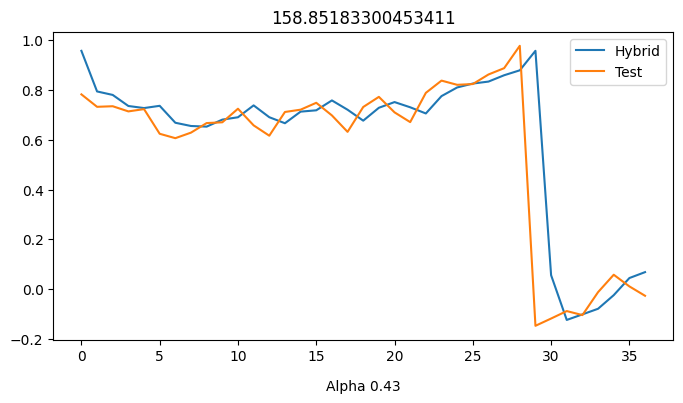

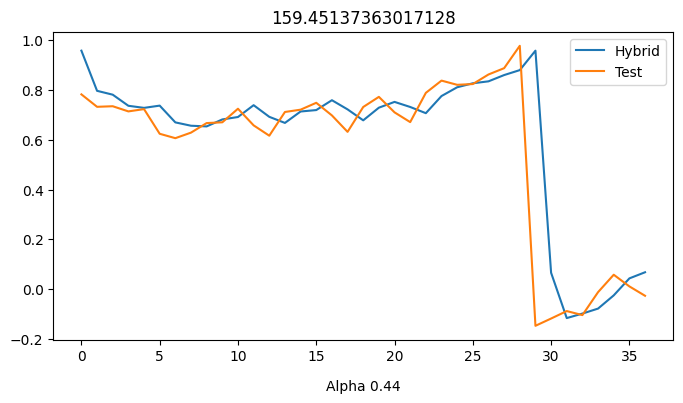

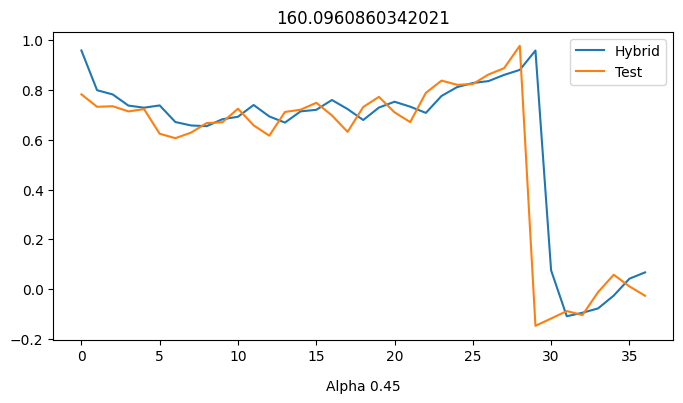

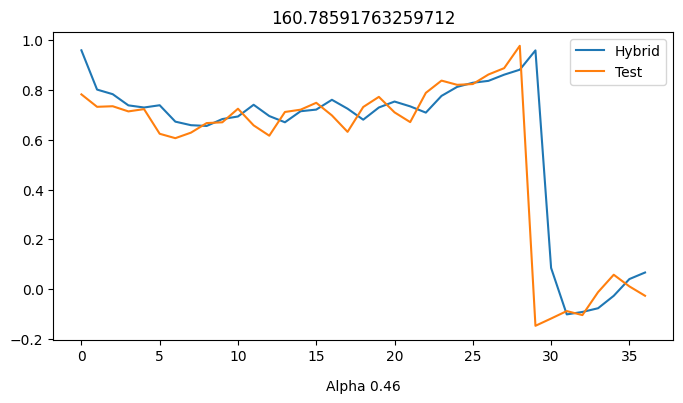

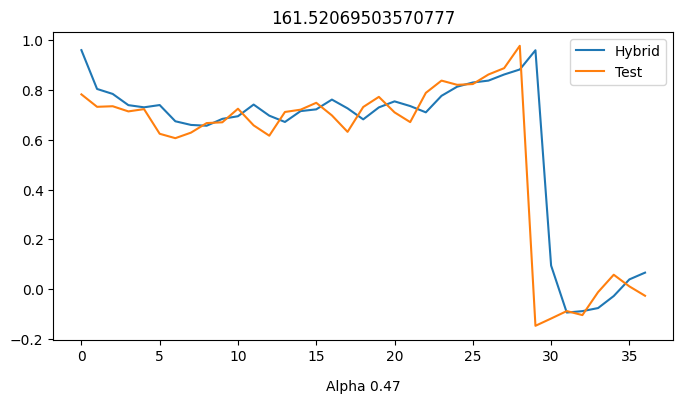

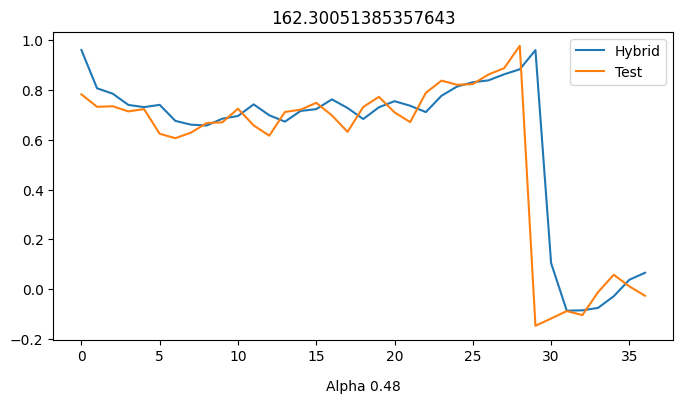

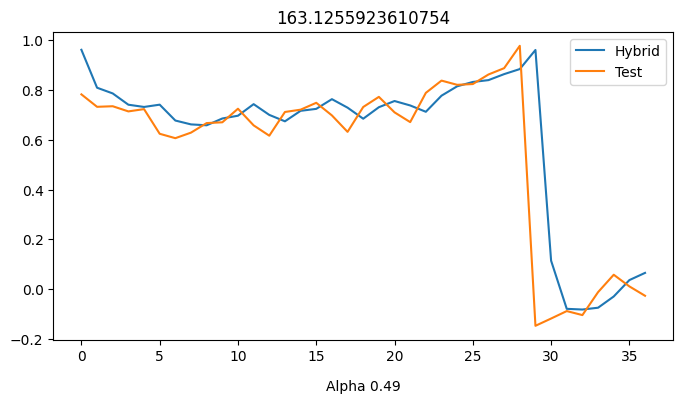

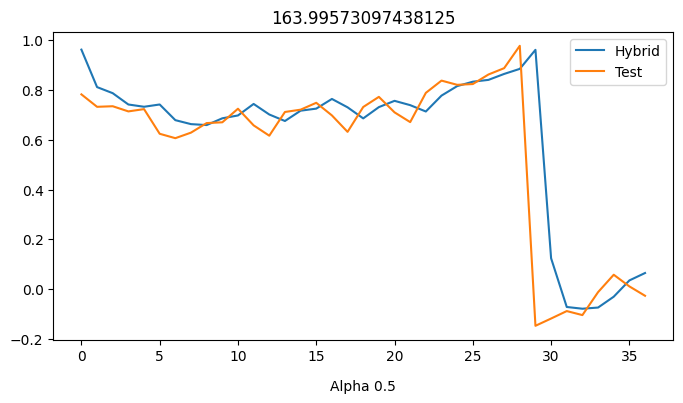

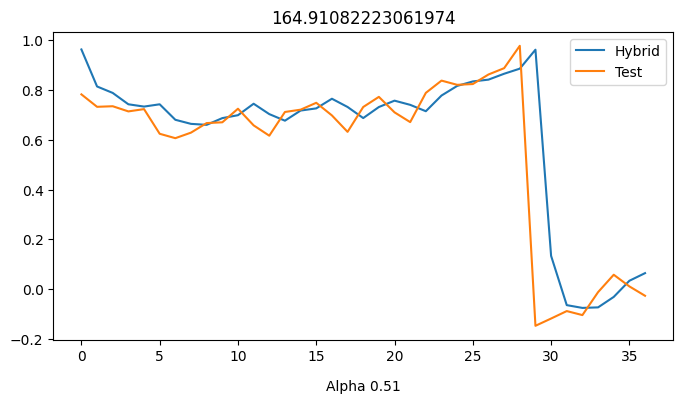

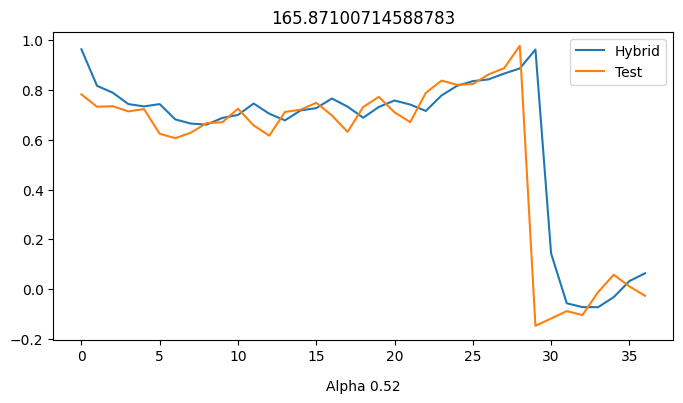

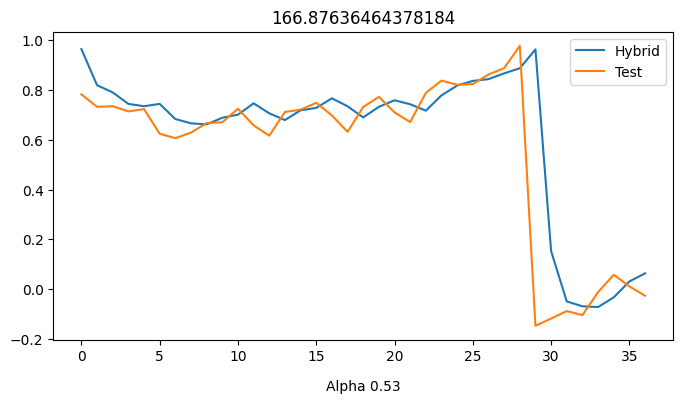

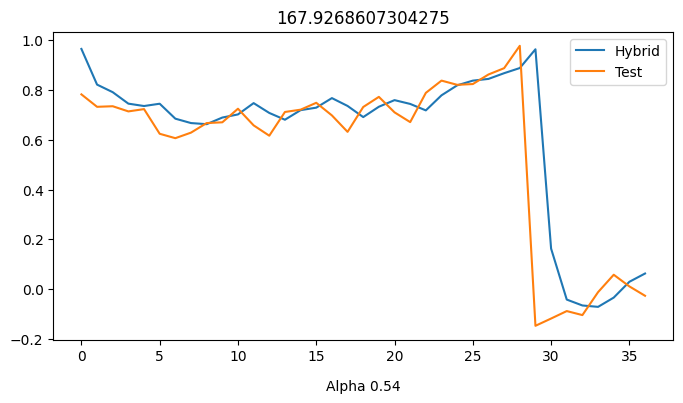

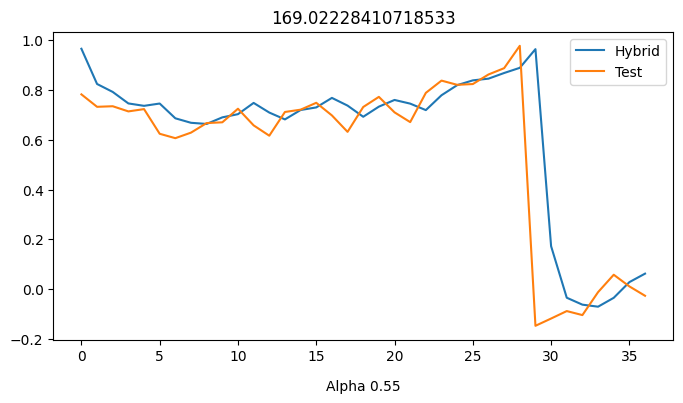

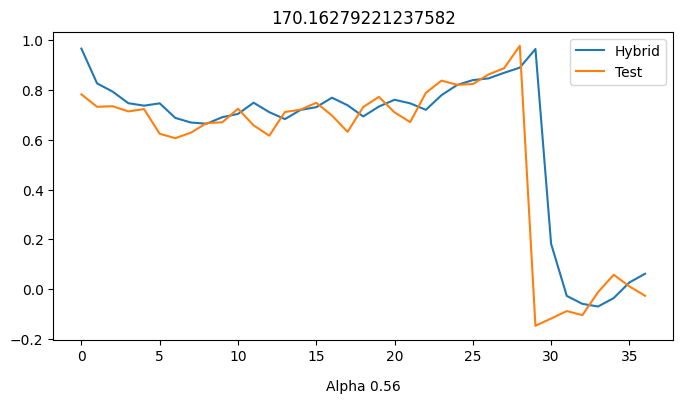

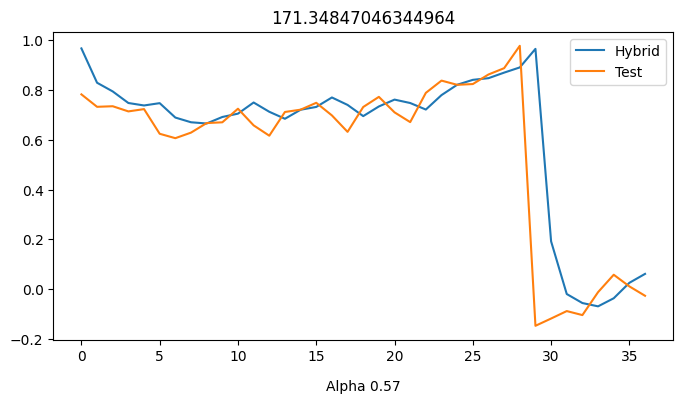

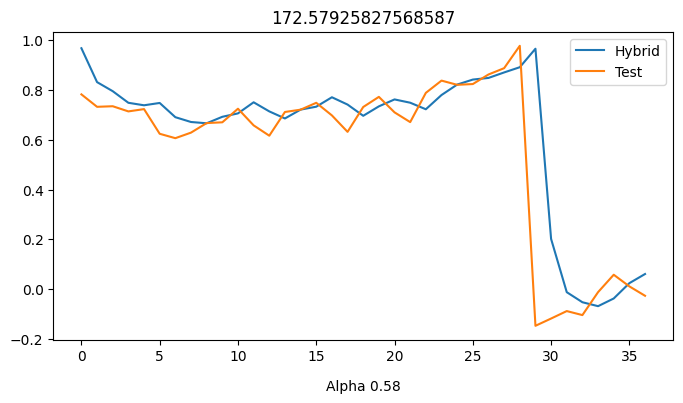

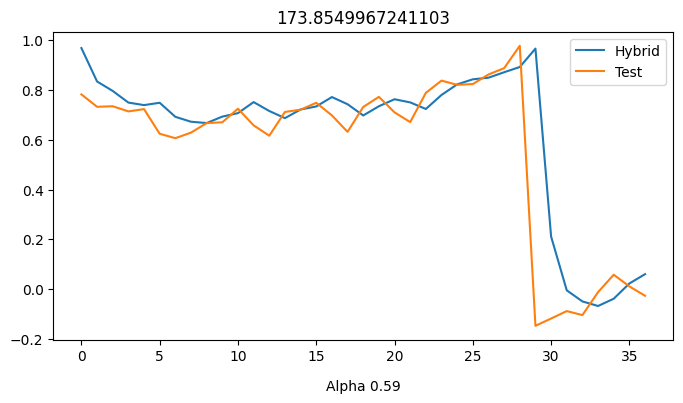

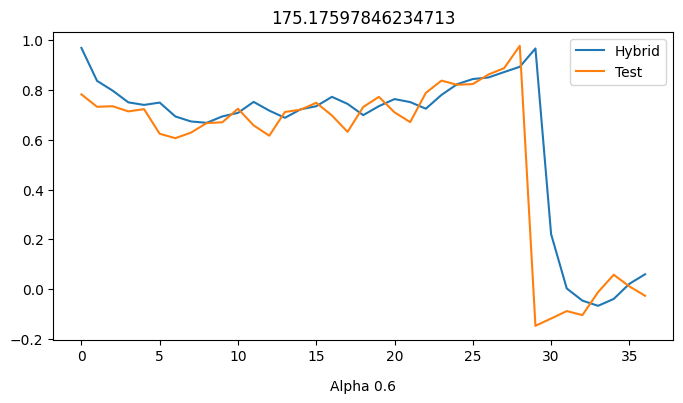

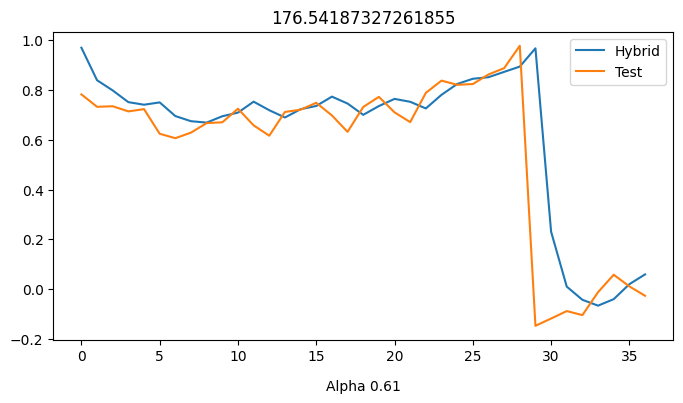

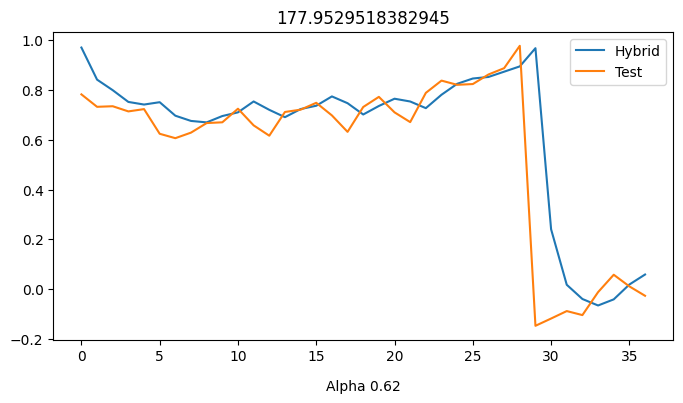

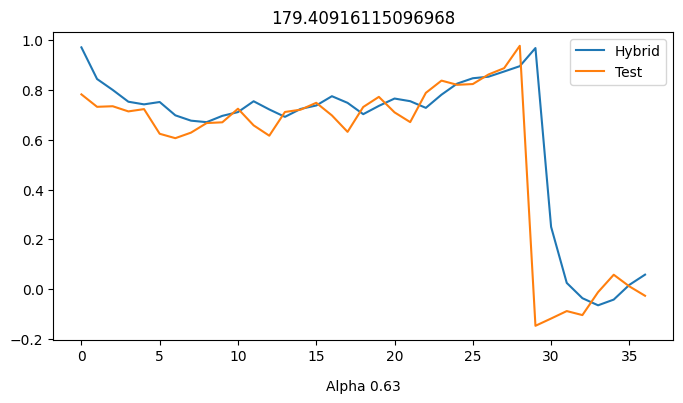

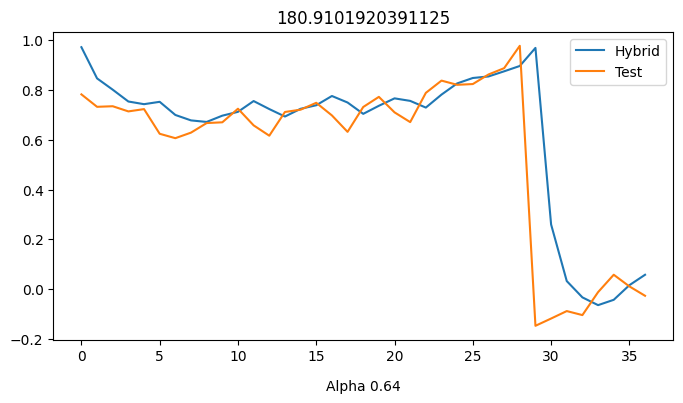

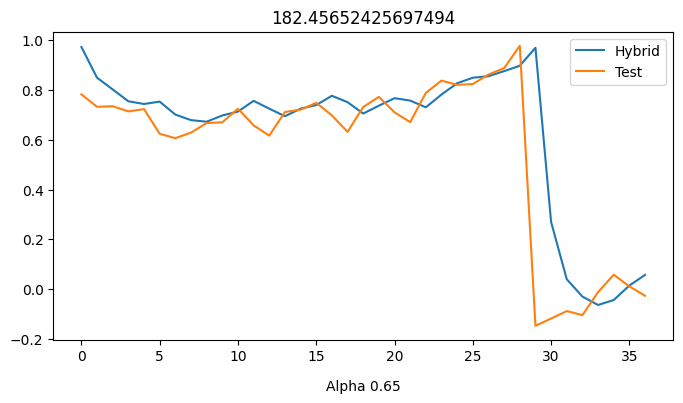

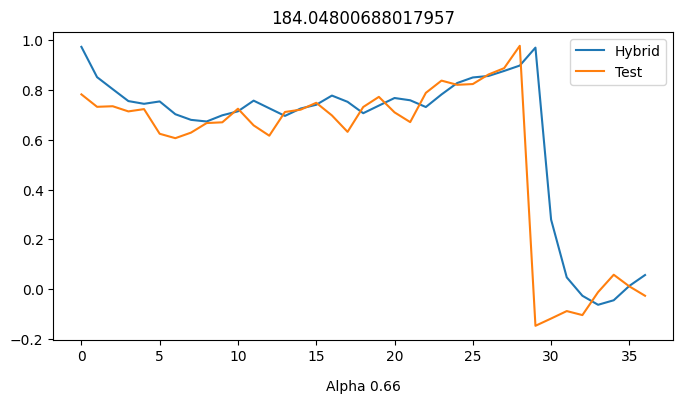

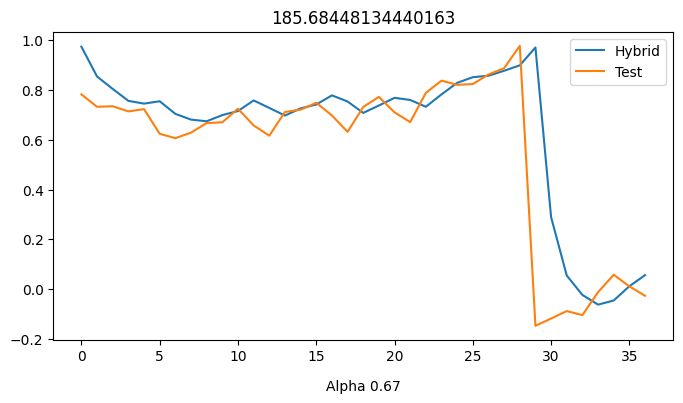

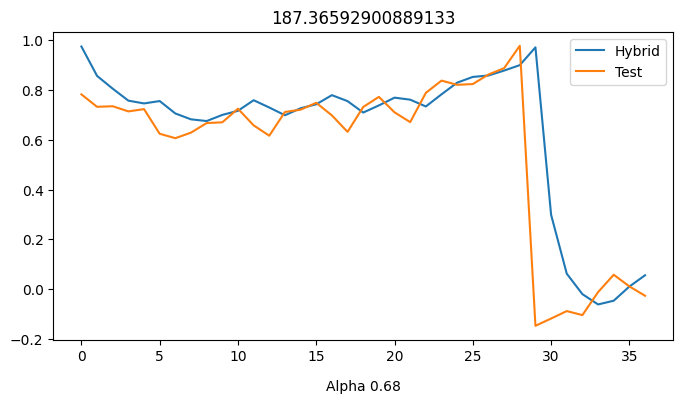

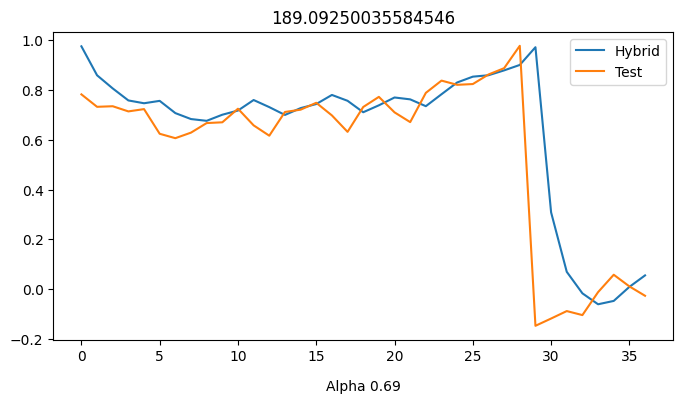

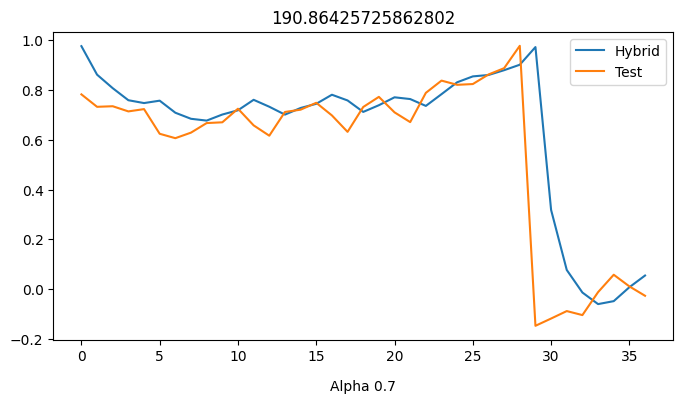

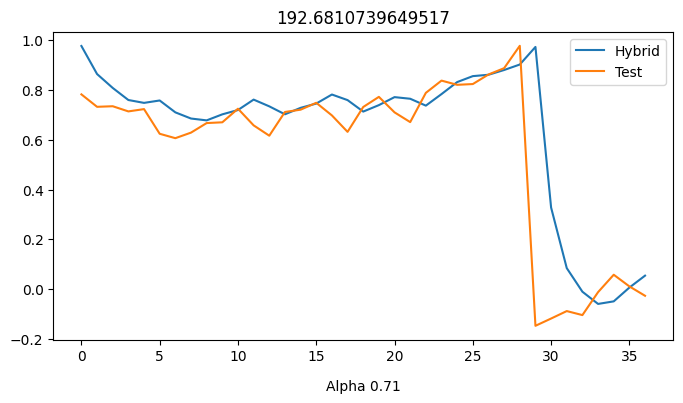

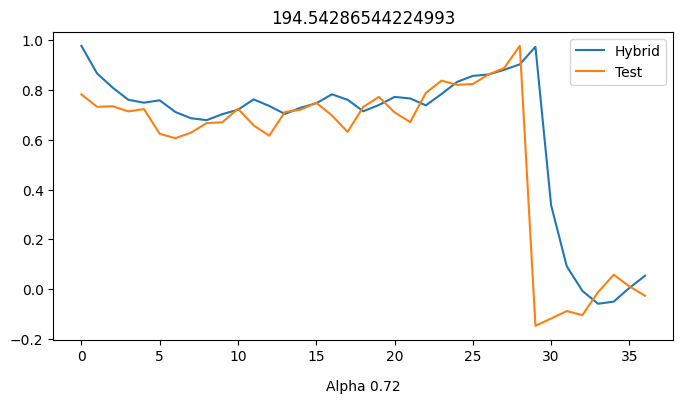

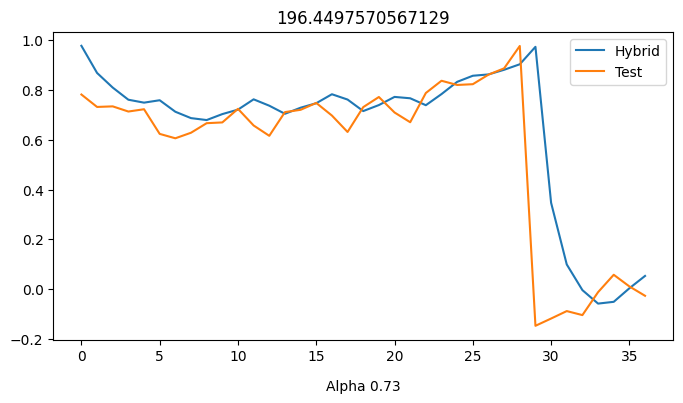

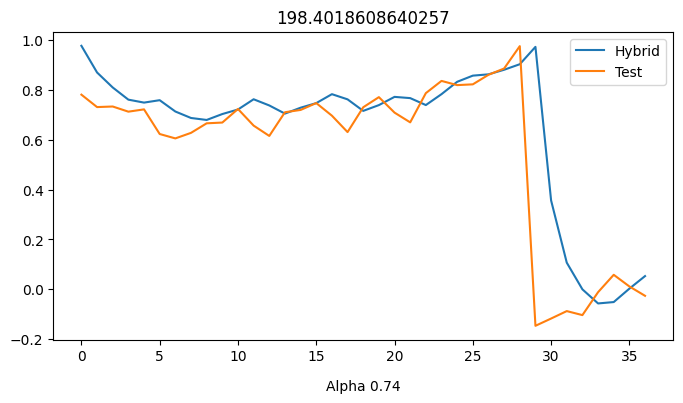

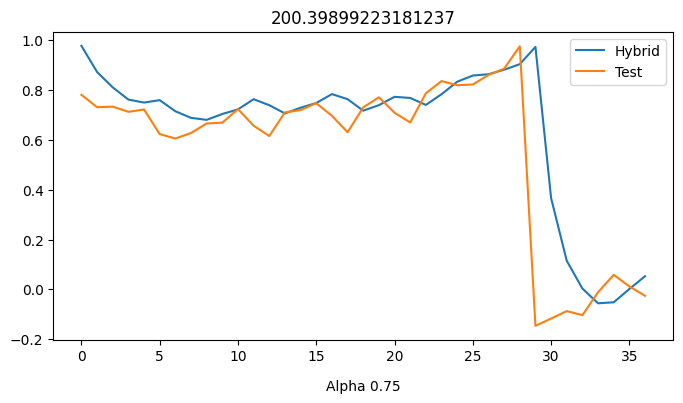

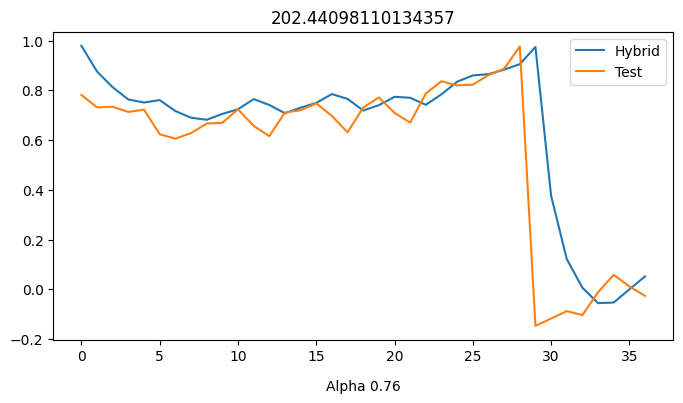

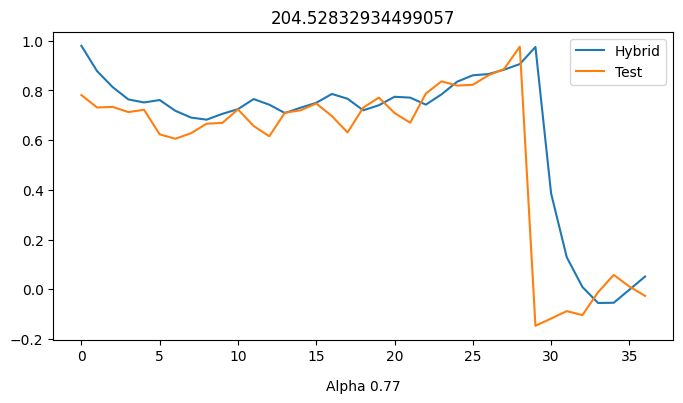

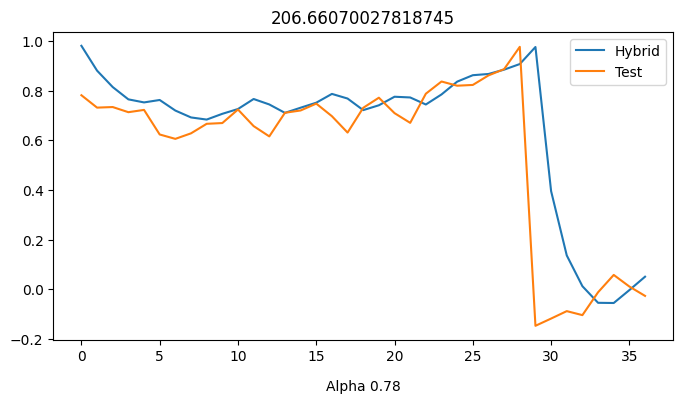

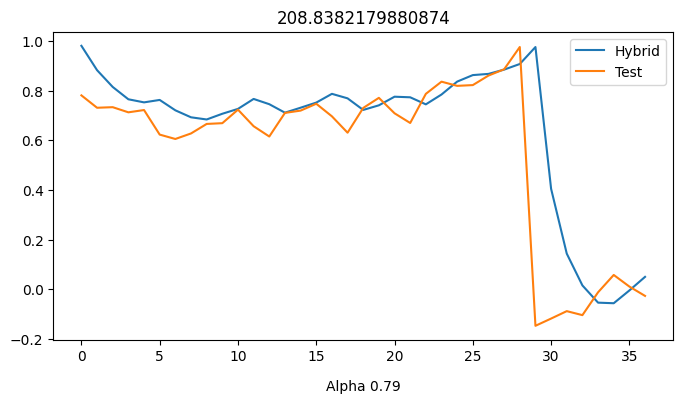

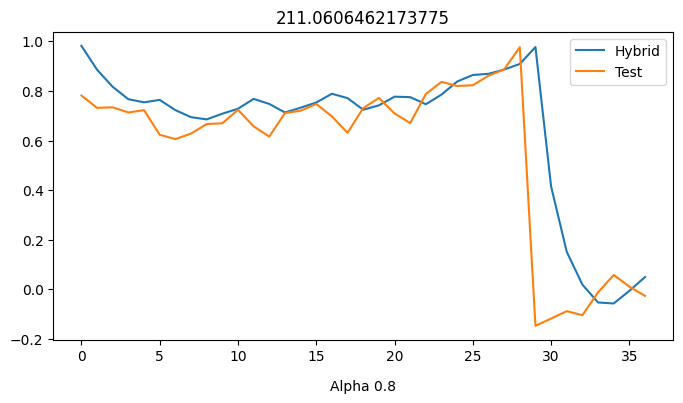

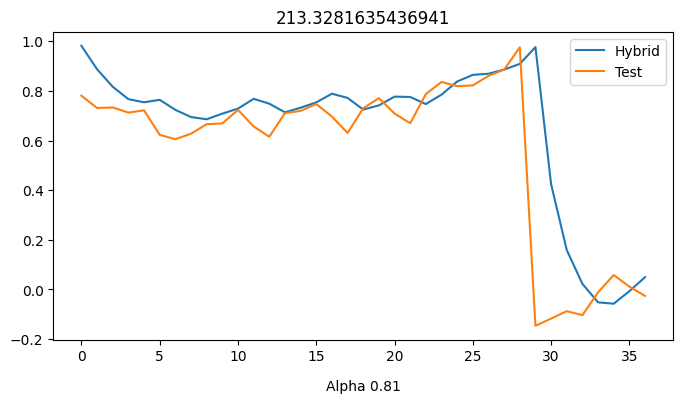

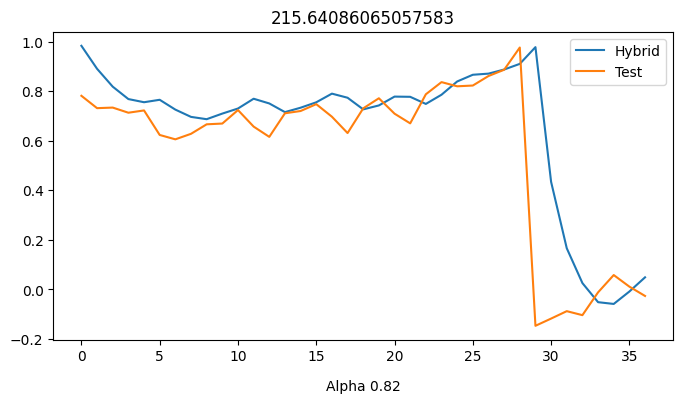

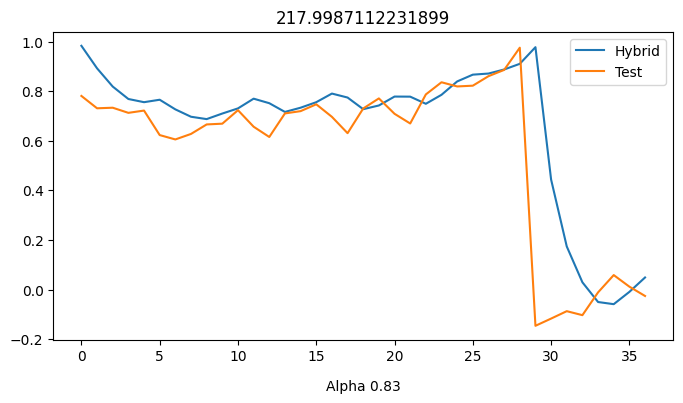

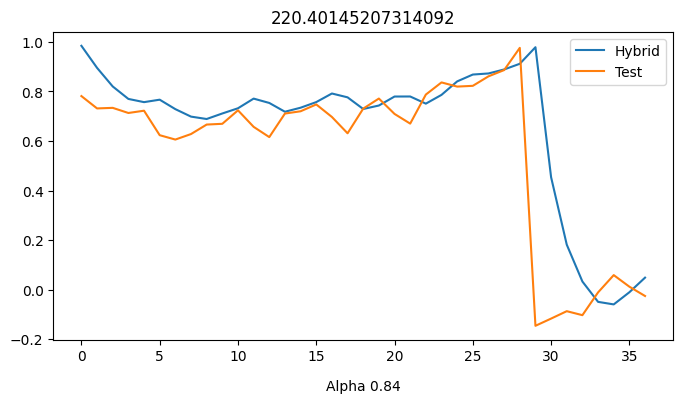

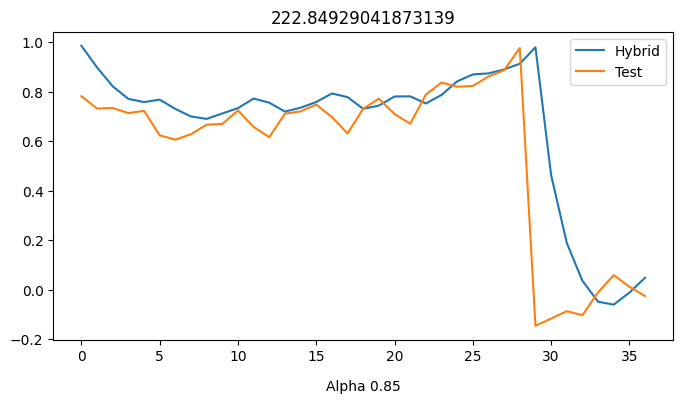

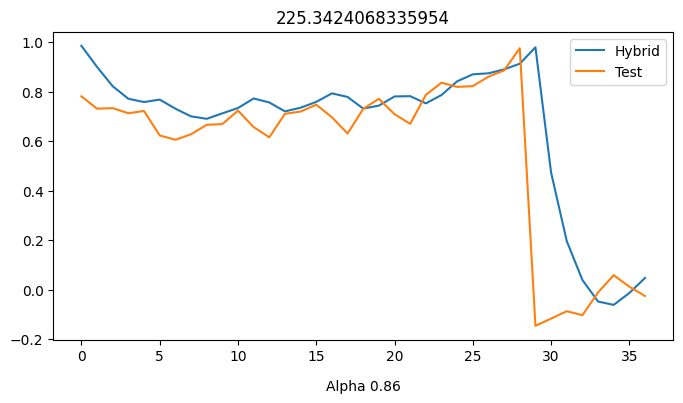

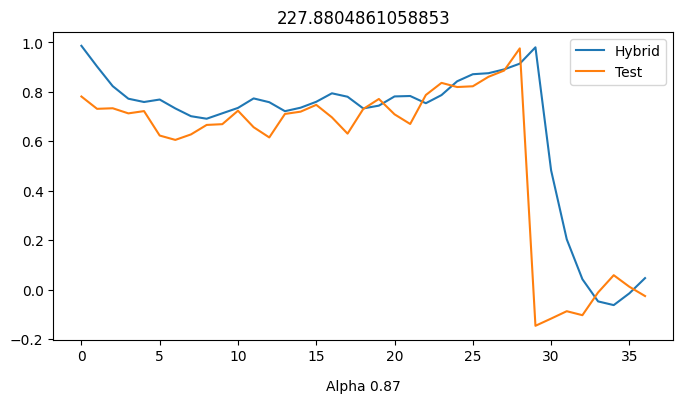

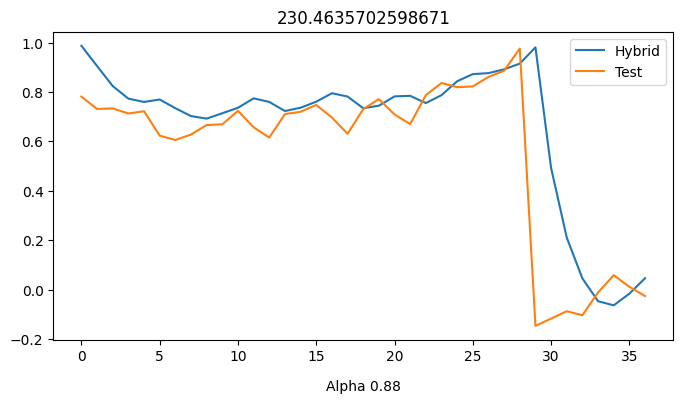

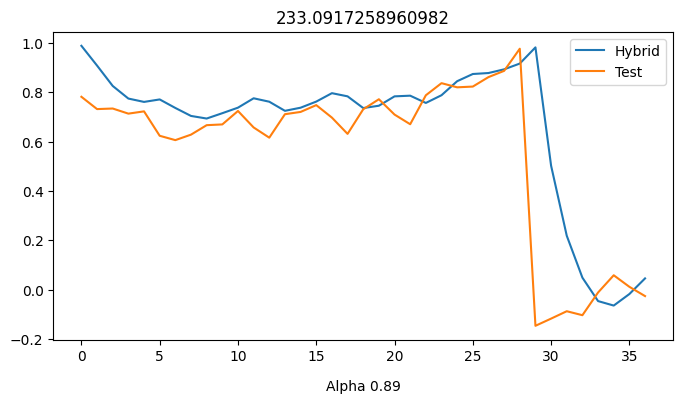

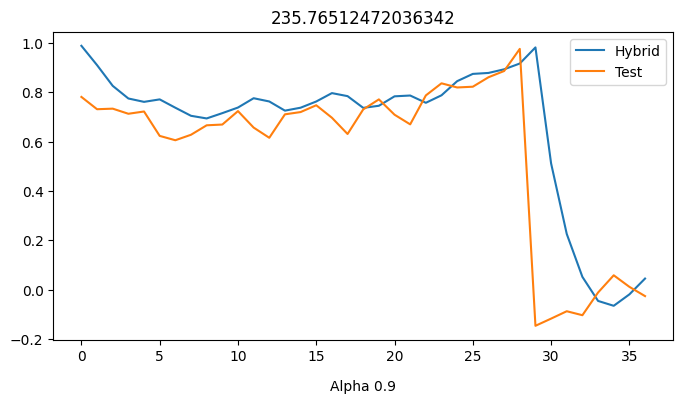

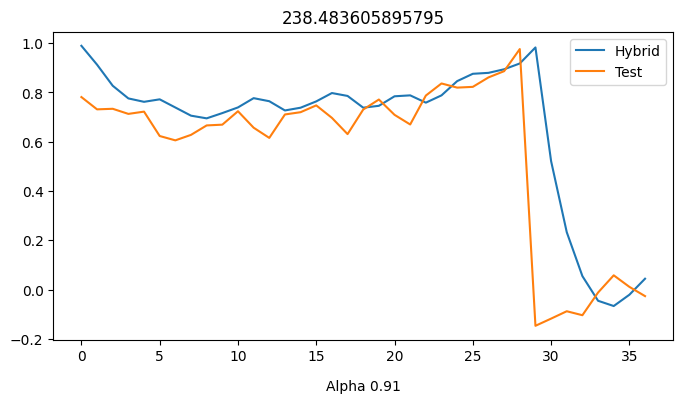

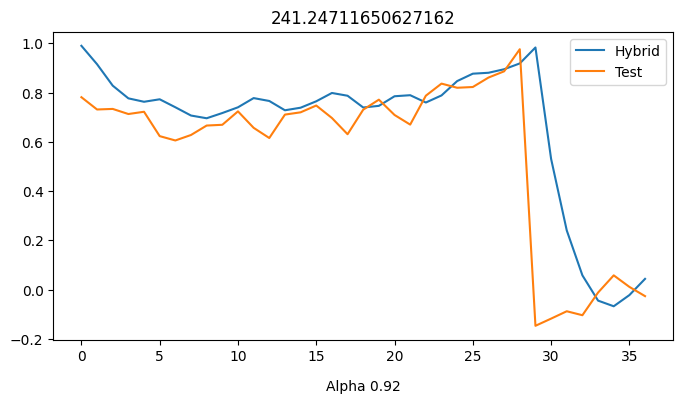

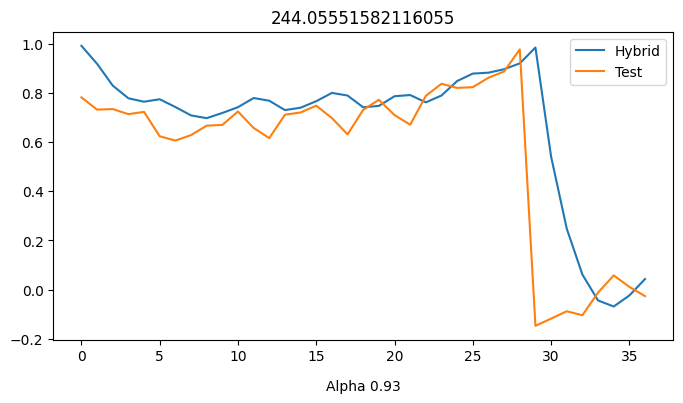

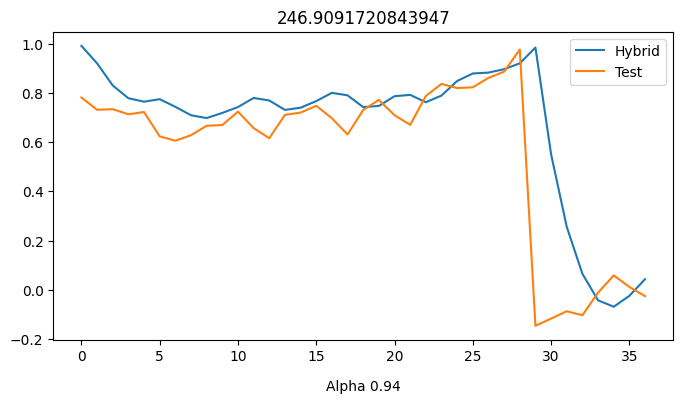

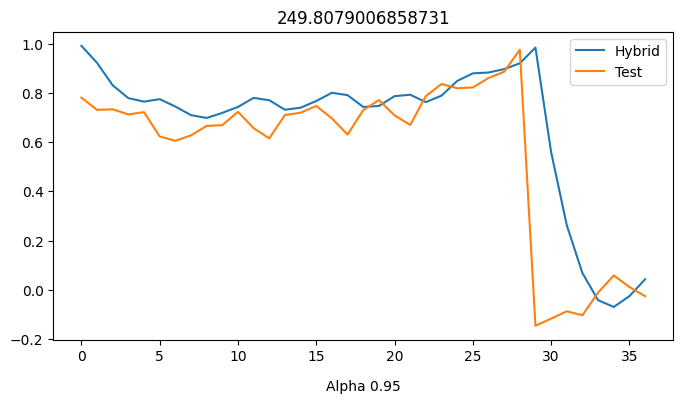

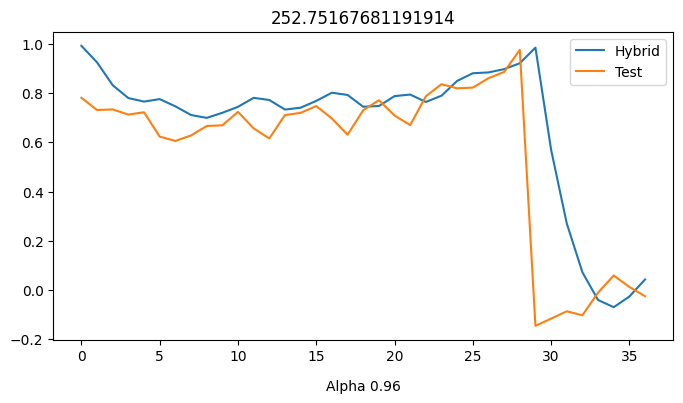

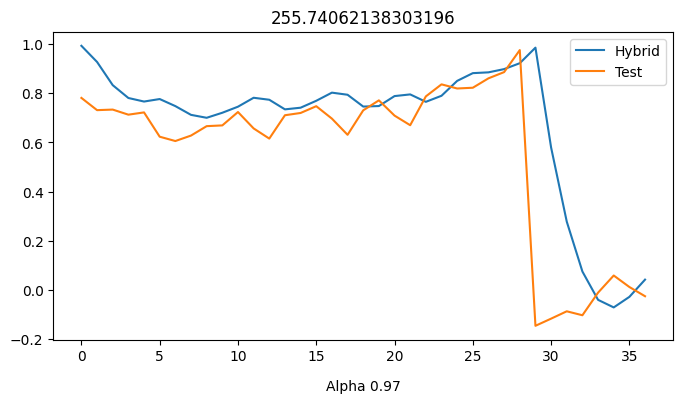

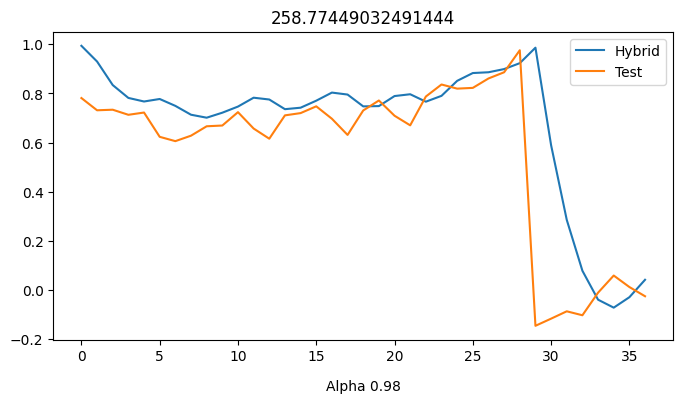

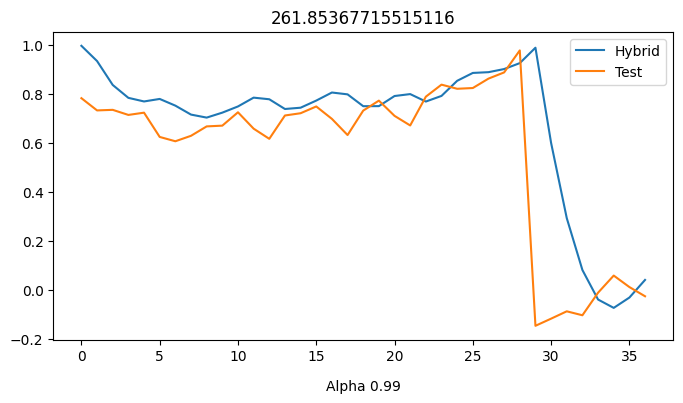

In [ ]:
from sklearn.metrics import mean_squared_error
temp = 99999999
alpha = 0
inverse_Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))
for i in range(1,100):
  fig, ax = plt.subplots(figsize=(8, 4))

  a = i / 100
  hybrid_pred_temp = a * lstm_pred + (1 - a) * gru_pred

  plt.plot(hybrid_pred_temp, label="Hybrid")
  plt.plot(Y_test, label="Test")
  plt.text(0.5, -0.15, f'Alpha {a}', ha='center', va='center', transform=ax.transAxes)

  inverse_Y_pred = scaler.inverse_transform(hybrid_pred_temp)
  mse_temp  = mean_squared_error(inverse_Y_test, inverse_Y_pred)
  if(mse_temp<temp):
    temp = mse_temp
    alpha = a
  plt.title(mse_temp)
  plt.legend()

  plt.show()


In [ ]:
alpha

0.3

In [ ]:
hybrid_pred = alpha * lstm_pred + (1 - alpha) * gru_pred

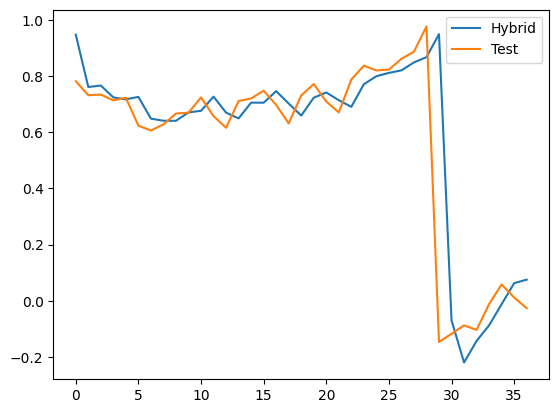

In [ ]:
plt.plot(hybrid_pred,label="Hybrid")
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
lstm_pred

array([[ 0.9956881 ],
       [ 0.93526655],
       [ 0.8363705 ],
       [ 0.78365624],
       [ 0.7688323 ],
       [ 0.7791204 ],
       [ 0.75254655],
       [ 0.71561515],
       [ 0.7031608 ],
       [ 0.72325796],
       [ 0.74877393],
       [ 0.7844901 ],
       [ 0.77859527],
       [ 0.7386454 ],
       [ 0.7431633 ],
       [ 0.77263486],
       [ 0.80539274],
       [ 0.79841435],
       [ 0.7500861 ],
       [ 0.74940425],
       [ 0.7909739 ],
       [ 0.79935443],
       [ 0.7688404 ],
       [ 0.7909834 ],
       [ 0.8530571 ],
       [ 0.8854395 ],
       [ 0.88844496],
       [ 0.90097207],
       [ 0.92520154],
       [ 0.9877213 ],
       [ 0.60867053],
       [ 0.30000916],
       [ 0.08421429],
       [-0.03875583],
       [-0.07429246],
       [-0.03273433],
       [ 0.04001406]], dtype=float32)

In [ ]:
hybrid_pred_real = scaler.inverse_transform(hybrid_pred)
y_real = scaler.inverse_transform(Y_test.reshape(-1,1))
hybrid_pred_real,y_real

(array([[262.5928 ],
        [250.45447],
        [250.8057 ],
        [248.03769],
        [247.5958 ],
        [248.16261],
        [243.11868],
        [242.62727],
        [242.61111],
        [244.5614 ],
        [244.93668],
        [248.22096],
        [244.51111],
        [243.17154],
        [246.82913],
        [246.81589],
        [249.50333],
        [246.62096],
        [243.8314 ],
        [247.97484],
        [249.18878],
        [247.39087],
        [245.86002],
        [251.10002],
        [252.95755],
        [253.72968],
        [254.31598],
        [256.1638 ],
        [257.38718],
        [262.7233 ],
        [196.31941],
        [186.54291],
        [191.5366 ],
        [195.17114],
        [200.06653],
        [204.94156],
        [205.7571 ]], dtype=float32),
 array([[251.8 ],
        [248.55],
        [248.7 ],
        [247.35],
        [247.95],
        [241.5 ],
        [240.35],
        [241.8 ],
        [244.3 ],
        [244.5 ],
        [248.05],
        

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_real, hybrid_pred_real)
mae

5.340276109850083

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_real, hybrid_pred_real)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 5.340276109850083
MSE: 155.1594339389751
RMSE: 12.45630097336184


In [ ]:
lstm_pred = scaler.inverse_transform(lstm_pred)
mae1 = mean_absolute_error(y_real, lstm_pred)
mse1 = mean_squared_error(y_real, lstm_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 8.801315472577068
MSE: 264.9778222501537
RMSE: 16.27813939767545


In [ ]:
gru_pred = scaler.inverse_transform(gru_pred)
mae1 = mean_absolute_error(y_real, gru_pred)
mse1 = mean_squared_error(y_real, gru_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 6.5292867299672706
MSE: 175.71565992780648
RMSE: 13.255778359938223


In [ ]:
lstm_pred_train = lstm.predict(X_train)
gru_pred_train = gru.predict(X_train)


6/6 [==============================] - 0s 29ms/step


In [ ]:
lstm_pred_val = lstm.predict(X_val)
gru_pred_val = gru.predict(X_val)

1/1 [==============================] - 0s 47ms/step


In [ ]:
hybrid_prediction_train = alpha * lstm_pred_train + (1 - alpha) * gru_pred_train
hybrid_prediction_train = scaler.inverse_transform(hybrid_prediction_train)

In [ ]:
hybrid_prediction_val = alpha * lstm_pred_val + (1 - alpha) * gru_pred_val
hybrid_prediction_val = scaler.inverse_transform(hybrid_prediction_val)

In [ ]:
hybrid_prediction_val

array([[253.8719 ],
       [249.79256],
       [250.77115],
       [252.56926],
       [260.29678],
       [253.44212],
       [252.23422],
       [253.4453 ],
       [251.67769],
       [245.34851],
       [243.01707],
       [242.3444 ],
       [242.20444],
       [244.0279 ],
       [244.88135],
       [245.16566],
       [247.774  ],
       [250.4379 ],
       [250.70935],
       [250.99117],
       [256.73907]], dtype=float32)

In [ ]:
y_plot = df[target]
y_plot = y_plot[timestamp:]


In [ ]:
indexes = y_plot.index

In [ ]:
indexes

Index(['21-Oct-2022', '24-Oct-2022', '25-Oct-2022', '27-Oct-2022',
       '28-Oct-2022', '31-Oct-2022', '01-Nov-2022', '02-Nov-2022',
       '03-Nov-2022', '04-Nov-2022',
       ...
       '08-Sep-2023', '11-Sep-2023', '12-Sep-2023', '13-Sep-2023',
       '14-Sep-2023', '15-Sep-2023', '18-Sep-2023', '20-Sep-2023',
       '21-Sep-2023', '22-Sep-2023'],
      dtype='object', name='Date ', length=229)

In [ ]:
hybrid_pred_test = hybrid_pred_real.flatten()

In [ ]:
hybrid_prediction_train = hybrid_prediction_train.flatten()
hybrid_prediction_val = hybrid_prediction_val.flatten()

In [ ]:
value = np.concatenate((hybrid_prediction_train,hybrid_prediction_val))
value = np.concatenate((value,hybrid_pred_test))

In [ ]:
value_df = pd.DataFrame(value,index = indexes,columns=["Close"])


In [ ]:
y_df = pd.DataFrame(y_plot)
y_df

close 
Date               
21-Oct-2022  217.30
24-Oct-2022  218.85
25-Oct-2022  218.50
27-Oct-2022  223.90
28-Oct-2022  226.80
...             ...
15-Sep-2023  194.10
18-Sep-2023  200.10
20-Sep-2023  204.65
21-Sep-2023  201.60
22-Sep-2023  199.15

[229 rows x 1 columns]

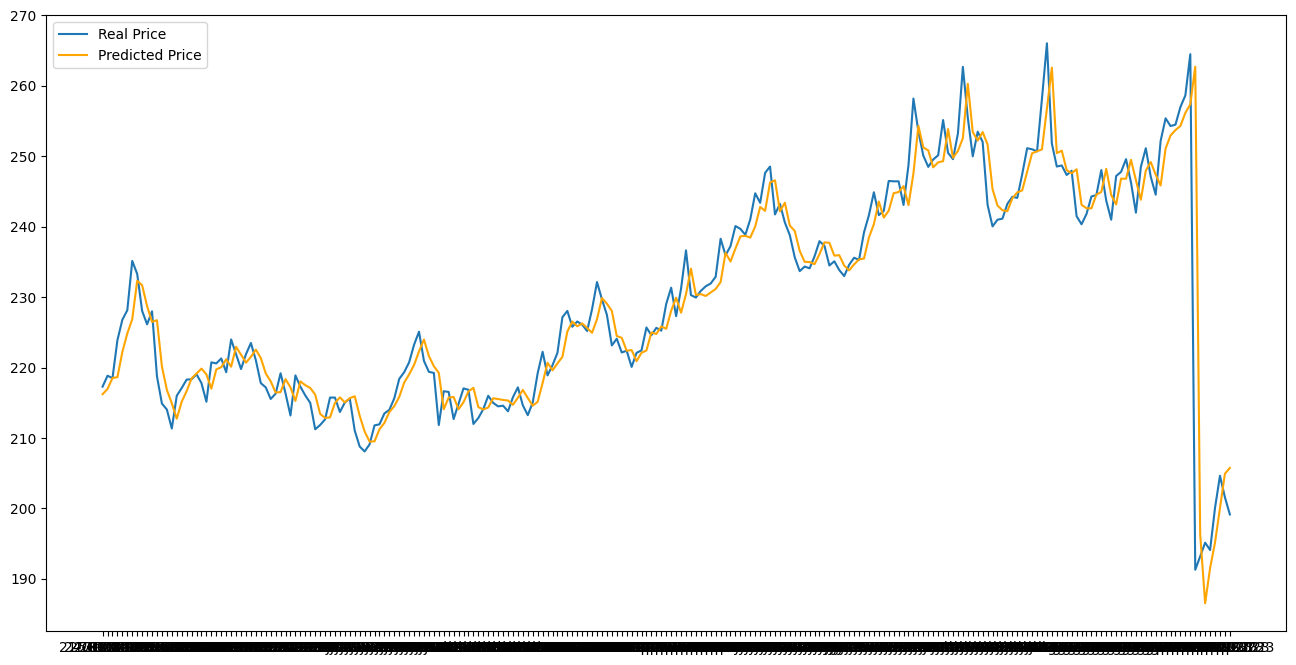

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_df.index,y_df['close '],label='Real Price')
plt.plot(value_df, label='Predicted Price',color='orange')
plt.legend()
plt.show()

In [ ]:
new_df = df.reset_index()
new_df = new_df[["Date ","close "]]
new_df = new_df.rename(columns = {"Date ":"ds","close ":"y"})
new_df.head()

ds       y
0  22-Sep-2022  220.10
1  23-Sep-2022  202.55
2  26-Sep-2022  200.85
3  27-Sep-2022  204.85
4  28-Sep-2022  207.70

In [ ]:
import datetime
new_df['ds'] = new_df['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [ ]:
from prophet import Prophet
fbp = Prophet(daily_seasonality = True)
fbp.fit(new_df)
fut = fbp.make_future_dataframe(periods=2)
forecast = fbp.predict(fut)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8yeuxje/mibeuap2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8yeuxje/rpuexhto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4092', 'data', 'file=/tmp/tmpn8yeuxje/mibeuap2.json', 'init=/tmp/tmpn8yeuxje/rpuexhto.json', 'output', 'file=/tmp/tmpn8yeuxje/prophet_modelqoun1ms2/prophet_model-20231223075025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(fbp, forecast)

In [ ]:
prophet_model2 = Prophet()

In [ ]:
train = train.reset_index()

In [ ]:
train = train[["Date ","close "]]
train = train.rename(columns = {"Date ":"ds","close ":"y"})

In [ ]:
train.head()

ds       y
0  22-Sep-2022  220.10
1  23-Sep-2022  202.55
2  26-Sep-2022  200.85
3  27-Sep-2022  204.85
4  28-Sep-2022  207.70

In [ ]:
train['ds'] = train['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [ ]:
new_test = test[20:]

In [ ]:
prophet_model2.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8yeuxje/xvn9p9na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn8yeuxje/pgur38jc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58697', 'data', 'file=/tmp/tmpn8yeuxje/xvn9p9na.json', 'init=/tmp/tmpn8yeuxje/pgur38jc.json', 'output', 'file=/tmp/tmpn8yeuxje/prophet_modelpteqekqj/prophet_model-20231223075026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model2.make_future_dataframe(periods=len(new_test))
prophet_predictions = prophet_model2.predict(future)

In [ ]:
prophet_predictions.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-09-22  209.152813  201.018881  213.352660   209.152813   209.152813   
1 2022-09-23  209.490309  200.984037  213.007045   209.490309   209.490309   
2 2022-09-26  210.502795  202.156947  214.511216   210.502795   210.502795   
3 2022-09-27  210.840291  202.460507  214.616774   210.840291   210.840291   
4 2022-09-28  211.177786  203.046694  215.191941   211.177786   211.177786   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       -1.844336             -1.844336             -1.844336 -1.844336   
1       -2.223158             -2.223158             -2.223158 -2.223158   
2       -2.346029             -2.346029             -2.346029 -2.346029   
3       -2.332501             -2.332501             -2.332501 -2.332501   
4       -1.678330             -1.678330             -1.678330 -1.678330   

   weekly_lower  weekly_upper  multiplicative_terms  \
0     -1.844336     -1.844336                   0.0   
1     -2.223158     -2.223158                   0.0   
2     -2.346029     -2.346029                   0.0   
3     -2.332501     -2.332501                   0.0   
4     -1.678330     -1.678330                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  207.308477  
1                         0.0                         0.0  207.267151  
2                         0.0                         0.0  208.156766  
3                         0.0                         0.0  208.507789  
4                         0.0                         0.0  209.499456

In [ ]:
test_real = df.iloc[:,6:7]
test_pred = prophet_predictions['yhat']

In [ ]:
test_real = test_real['close ']

In [ ]:
mse_prophet = mean_squared_error(test_real,test_pred)
mse_prophet

170.49813008220207

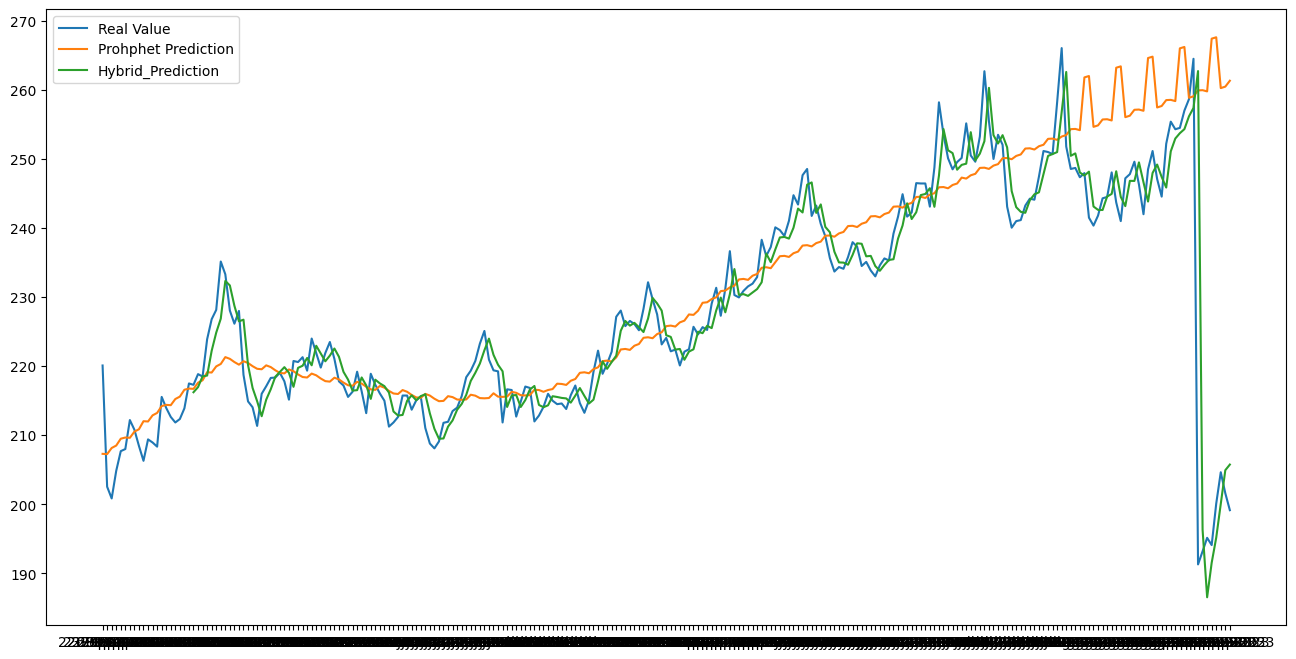

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test_real, label = "Real Value")
plt.plot(test_pred, label="Prohphet Prediction")
plt.plot(value_df['Close'], label = "Hybrid_Prediction")
plt.legend()
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(lstm_model, 'lstm_model.joblib')
joblib.dump(gru_model, 'gru_model.joblib')

['gru_model.joblib']

In [ ]:
joblib.dump(prophet_model2, 'prophet_model.joblib')

['prophet_model.joblib']